## Limpeza dos dados

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('../datasets/fakeTelegram_SemTravaZap_BR_2022.csv')
df.head()



Unnamed: 0         date_message               id_member_anonymous  \
0           0  2022-10-05 06:25:04  1078cc958f0febe28f4d03207660715f   
1           1  2022-10-05 06:25:08                               NaN   
2           2  2022-10-05 06:26:28  92a2d8fd7144074f659d1d29dc3751da   
3           3  2022-10-05 06:27:28  d60aa38f62b4977426b70944af4aff72   
4           4  2022-10-05 06:27:44  cd6979b0b5265f08468fa1689b6300ce   

                 id_group_anonymous                                 media  \
0  12283e08a2eb5789201e105b34489ee7                                   NaN   
1  12283e08a2eb5789201e105b34489ee7                                   NaN   
2  9f2d7394334eb224c061c9740b5748fc                                   NaN   
3  c8f2de56550ed0bf85249608b7ead93d  94dca4cda503100ebfda7ce2bcc060eb.jpg   
4  e56ec342fc599ebb4ed89655eb6f03aa  5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg   

  media_type media_url  has_media  has_media_url  trava_zap  ...  \
0        NaN       NaN      False          False      False  ...   
1        NaN       NaN      False          False      False  ...   
2        NaN       NaN      False          False      False  ...   
3  image/jpg       NaN       True          False      False  ...   
4  image/jpg       NaN       True          False      False  ...   

  dataset_info_id                 date_system score_sentiment  \
0               5  2022-10-05 06:25:28.863641          0.0000   
1               5  2022-10-05 06:25:28.926311          0.0644   
2               5  2022-10-05 06:26:29.361949         -0.3551   
3               5  2022-10-05 06:27:29.935624          0.0000   
4               5  2022-10-05 06:28:29.316325             NaN   

   score_misinformation  id_message  message_type messenger media_name  \
0                   NaN       16385         Texto  telegram        NaN   
1                   NaN       16386         Texto  telegram        NaN   
2              0.157242       16366         Texto  telegram        NaN   
3                   NaN       19281        Imagem  telegram        NaN   
4                   NaN      507185        Imagem  telegram        NaN   

                          media_md5 caracteres_especial_count  
0                               NaN                        24  
1                               NaN                        29  
2                               NaN                        77  
3  94dca4cda503100ebfda7ce2bcc060eb                         8  
4  5ad5c8bbe9da93a37fecf3e5aa5b0637                         0  

[5 rows x 21 columns]

In [ ]:
df.columns 

Index(['Unnamed: 0', 'date_message', 'id_member_anonymous',
       'id_group_anonymous', 'media', 'media_type', 'media_url', 'has_media',
       'has_media_url', 'trava_zap', 'text_content_anonymous',
       'dataset_info_id', 'date_system', 'score_sentiment',
       'score_misinformation', 'id_message', 'message_type', 'messenger',
       'media_name', 'media_md5', 'caracteres_especial_count'],
      dtype='object')

### Remoção de trava-zap

In [ ]:

df = df[df['trava_zap'] == False]
df.shape

(557515, 21)

In [ ]:
df.columns

Index(['Unnamed: 0', 'date_message', 'id_member_anonymous',
       'id_group_anonymous', 'media', 'media_type', 'media_url', 'has_media',
       'has_media_url', 'trava_zap', 'text_content_anonymous',
       'dataset_info_id', 'date_system', 'score_sentiment',
       'score_misinformation', 'id_message', 'message_type', 'messenger',
       'media_name', 'media_md5', 'caracteres_especial_count'],
      dtype='object')

### Remoção de valores nulos

In [ ]:
# Excluir as linhas onde 'text_content_anonymous' é nula, modificando o dataframe original
df.dropna(subset=['text_content_anonymous'], inplace=True)
df.shape

(444146, 21)

### Removendo texto com menos de 5 palavras 

In [ ]:

df_filtrado = df[df['text_content_anonymous'].str.split().str.len() >= 5]

df_filtrado.shape

(339231, 21)

### Removendo duplicatas

In [ ]:

df_filtrado_sem_duplicadas = df_filtrado.drop_duplicates()
df_filtrado_sem_duplicadas.shape

(339231, 21)

In [ ]:
df_filtrado_sem_duplicadas.head()

Unnamed: 0         date_message               id_member_anonymous  \
0           0  2022-10-05 06:25:04  1078cc958f0febe28f4d03207660715f   
1           1  2022-10-05 06:25:08                               NaN   
2           2  2022-10-05 06:26:28  92a2d8fd7144074f659d1d29dc3751da   
3           3  2022-10-05 06:27:28  d60aa38f62b4977426b70944af4aff72   
4           5  2022-10-05 06:28:30                               NaN   

                 id_group_anonymous                                 media  \
0  12283e08a2eb5789201e105b34489ee7                                   NaN   
1  12283e08a2eb5789201e105b34489ee7                                   NaN   
2  9f2d7394334eb224c061c9740b5748fc                                   NaN   
3  c8f2de56550ed0bf85249608b7ead93d  94dca4cda503100ebfda7ce2bcc060eb.jpg   
4  b52442a5fbc459ae590dca0d215e32f9                                   NaN   

  media_type media_url  has_media  has_media_url  trava_zap  ...  \
0        NaN       NaN      False          False      False  ...   
1        NaN       NaN      False          False      False  ...   
2        NaN       NaN      False          False      False  ...   
3  image/jpg       NaN       True          False      False  ...   
4        NaN       NaN      False          False      False  ...   

  dataset_info_id                 date_system score_sentiment  \
0               5  2022-10-05 06:25:28.863641          0.0000   
1               5  2022-10-05 06:25:28.926311          0.0644   
2               5  2022-10-05 06:26:29.361949         -0.3551   
3               5  2022-10-05 06:27:29.935624          0.0000   
4               5  2022-10-05 06:29:29.046694          0.7003   

   score_misinformation  id_message  message_type messenger media_name  \
0                   NaN       16385         Texto  telegram        NaN   
1                   NaN       16386         Texto  telegram        NaN   
2              0.157242       16366         Texto  telegram        NaN   
3                   NaN       19281        Imagem  telegram        NaN   
4              0.197813        2735         Texto  telegram        NaN   

                          media_md5 caracteres_especial_count  
0                               NaN                        24  
1                               NaN                        29  
2                               NaN                        77  
3  94dca4cda503100ebfda7ce2bcc060eb                         8  
4                               NaN                        37  

[5 rows x 21 columns]

### Pré-processamento no texto

In [ ]:
import re
from urllib.parse import urlparse

def preprocess_text(text):
    # 1. Transformar em minúsculas
    text = text.lower()

    # 2. Reduzir repetições exageradas (letras ou emojis)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # 3. Substituir URLs por seus domínios
    def substituir_url_por_dominio(match):
        url = match.group(0)
        try:
            parsed = urlparse(url)
            dominio = parsed.netloc
            # Remove "www." do domínio se existir
            dominio = dominio.replace("www.", "")
            return dominio
        except Exception:
            return ''  # Se der erro, remove o texto

    # Regex de URL mais seguro
    url_regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    text = re.sub(url_regex, substituir_url_por_dominio, text)

    return text

# Aplicar ao dataframe
df_filtrado_sem_duplicadas['text_content_preprocessado'] = df_filtrado_sem_duplicadas['text_content_anonymous'].dropna().astype(str).apply(preprocess_text)


In [ ]:
df_filtrado_sem_duplicadas.head()

Unnamed: 0         date_message               id_member_anonymous  \
0           0  2022-10-05 06:25:04  1078cc958f0febe28f4d03207660715f   
1           1  2022-10-05 06:25:08                               NaN   
2           2  2022-10-05 06:26:28  92a2d8fd7144074f659d1d29dc3751da   
3           3  2022-10-05 06:27:28  d60aa38f62b4977426b70944af4aff72   
5           5  2022-10-05 06:28:30                               NaN   

                 id_group_anonymous                                 media  \
0  12283e08a2eb5789201e105b34489ee7                                   NaN   
1  12283e08a2eb5789201e105b34489ee7                                   NaN   
2  9f2d7394334eb224c061c9740b5748fc                                   NaN   
3  c8f2de56550ed0bf85249608b7ead93d  94dca4cda503100ebfda7ce2bcc060eb.jpg   
5  b52442a5fbc459ae590dca0d215e32f9                                   NaN   

  media_type media_url  has_media  has_media_url  trava_zap  ...  \
0        NaN       NaN      False          False      False  ...   
1        NaN       NaN      False          False      False  ...   
2        NaN       NaN      False          False      False  ...   
3  image/jpg       NaN       True          False      False  ...   
5        NaN       NaN      False          False      False  ...   

                  date_system  score_sentiment score_misinformation  \
0  2022-10-05 06:25:28.863641           0.0000                  NaN   
1  2022-10-05 06:25:28.926311           0.0644                  NaN   
2  2022-10-05 06:26:29.361949          -0.3551             0.157242   
3  2022-10-05 06:27:29.935624           0.0000                  NaN   
5  2022-10-05 06:29:29.046694           0.7003             0.197813   

   id_message  message_type  messenger media_name  \
0       16385         Texto   telegram        NaN   
1       16386         Texto   telegram        NaN   
2       16366         Texto   telegram        NaN   
3       19281        Imagem   telegram        NaN   
5        2735         Texto   telegram        NaN   

                          media_md5 caracteres_especial_count  \
0                               NaN                        24   
1                               NaN                        29   
2                               NaN                        77   
3  94dca4cda503100ebfda7ce2bcc060eb                         8   
5                               NaN                        37   

                          text_content_preprocessado  
0  então é fato renato o áudio que eu ouvi no wha...  
1  saiu no youtube do presidente a 8 horas atrás,...  
2  é isso, nossa parte já foi quase toda feita. n...  
3           gente achei eles em uma seita maçonárica  
5  kķkk to rindo até agora..quem disse q ia fazer...  

[5 rows x 22 columns]

In [ ]:
df_filtrado_sem_duplicadas.to_csv('../datasets/fakeTelegram_filtrado_BR_2022.csv', index=False)

In [4]:
df_limpo = pd.read_csv('../datasets/fakeTelegram_filtrado_BR_2022.csv')

### Medidas de TendÊncia central e Medidas de Variabilidade

In [ ]:
df_medidas = df_limpo.copy()
df_medidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339231 entries, 0 to 339230
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  339231 non-null  int64  
 1   date_message                339231 non-null  object 
 2   id_member_anonymous         142870 non-null  object 
 3   id_group_anonymous          339231 non-null  object 
 4   media                       126431 non-null  object 
 5   media_type                  126431 non-null  object 
 6   media_url                   82936 non-null   object 
 7   has_media                   339231 non-null  bool   
 8   has_media_url               339231 non-null  bool   
 9   trava_zap                   339231 non-null  bool   
 10  text_content_anonymous      339231 non-null  object 
 11  dataset_info_id             339231 non-null  int64  
 12  date_system                 339231 non-null  object 
 13  score_sentimen

In [ ]:
df_medidas.describe()

Unnamed: 0  dataset_info_id  score_sentiment  score_misinformation  \
count  339231.000000         339231.0    339184.000000         167197.000000   
mean   279270.729927              5.0         0.022028              0.312291   
std    159547.547111              0.0         0.529767              0.293717   
min         0.000000              5.0        -1.000000              0.000003   
25%    129886.500000              5.0        -0.381800              0.078455   
50%    294651.000000              5.0         0.000000              0.197667   
75%    416458.500000              5.0         0.505300              0.490531   
max    557585.000000              5.0         0.999200              1.000000   

         id_message  caracteres_especial_count  
count  3.392310e+05              339231.000000  
mean   4.218781e+05                  67.016758  
std    4.843760e+05                 120.017390  
min    2.000000e+00                   4.000000  
25%    1.991550e+04                  18.000000  
50%    8.488600e+04                  31.000000  
75%    9.730550e+05                  62.000000  
max    1.516436e+06                1898.000000

In [ ]:
coluna = df_medidas['score_sentiment'].dropna()

variabilidade = {
    'Amplitude': coluna.max() - coluna.min(),
    'Variância': coluna.var(),
    'Desvio Absoluto Médio': (coluna - coluna.mean()).abs().mean(),
    'IQR (Intervalo Interquartil)': coluna.quantile(0.75) - coluna.quantile(0.25)
}

for nome, valor in variabilidade.items():
    print(f"{nome}: {valor:.4f}")


Amplitude: 1.9992
Variância: 0.2807
Desvio Absoluto Médio: 0.4258
IQR (Intervalo Interquartil): 0.8871


In [ ]:
coluna = df_medidas['score_misinformation'].dropna()

variabilidade = {
    'Amplitude': coluna.max() - coluna.min(),
    'Variância': coluna.var(),
    'Desvio Absoluto Médio': (coluna - coluna.mean()).abs().mean(),
    'IQR (Intervalo Interquartil)': coluna.quantile(0.75) - coluna.quantile(0.25)
}

for nome, valor in variabilidade.items():
    print(f"{nome}: {valor:.4f}")


Amplitude: 1.0000
Variância: 0.0863
Desvio Absoluto Médio: 0.2443
IQR (Intervalo Interquartil): 0.4121


In [ ]:
coluna = df_medidas['caracteres_especial_count'].dropna()

variabilidade = {
    'Amplitude': coluna.max() - coluna.min(),
    'Variância': coluna.var(),
    'Desvio Absoluto Médio': (coluna - coluna.mean()).abs().mean(),
    'IQR (Intervalo Interquartil)': coluna.quantile(0.75) - coluna.quantile(0.25)
}

for nome, valor in variabilidade.items():
    print(f"{nome}: {valor:.4f}")


Amplitude: 1894.0000
Variância: 14404.1738
Desvio Absoluto Médio: 59.5770
IQR (Intervalo Interquartil): 44.0000


### Tabela de FrequÊncia e Histograma

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


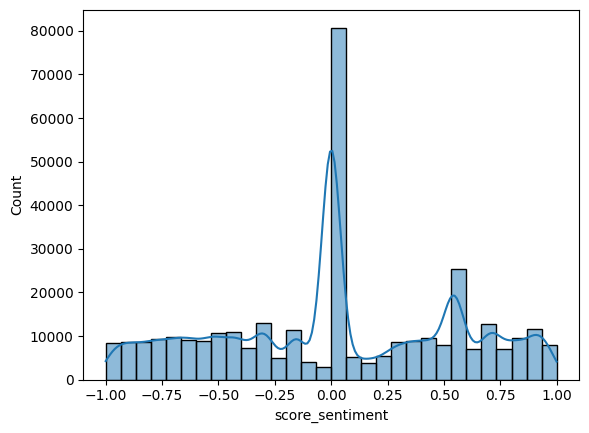

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


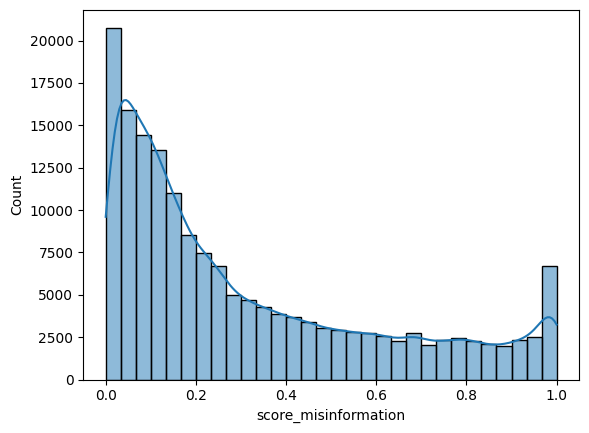

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


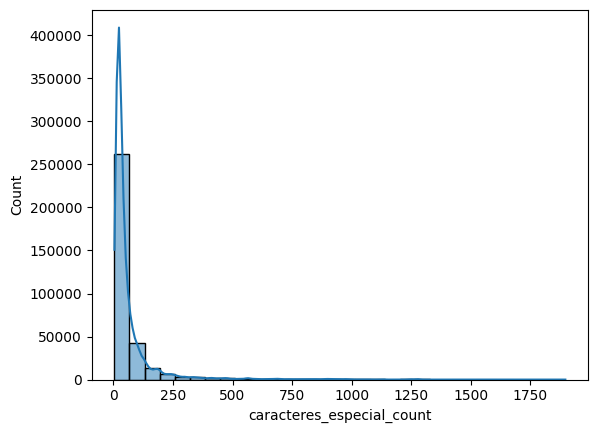

In [ ]:
df_frequencia_hist = df_limpo.copy()

sns.histplot(df_frequencia_hist['score_sentiment'], bins=30, kde=True)
plt.show()


sns.histplot(df_frequencia_hist['score_misinformation'], bins=30, kde=True)
plt.show()

sns.histplot(df_frequencia_hist['caracteres_especial_count'], bins=30, kde=True)
plt.show()



In [ ]:
import pandas as pd


# Frequência absoluta
frequencia_abs = df_frequencia_hist['score_sentiment'].value_counts().sort_index()


# Frequência absoluta acumulada
frequencia_abs_ac = frequencia_abs.cumsum()

# Monta o DataFrame final
tabela_freq = pd.DataFrame({
    'frequencia_absoluta': frequencia_abs,
    'frequencia_absoluta_acumulada': frequencia_abs_ac
}).reset_index()


tabela_freq = tabela_freq.rename(columns={'index': 'score_sentiment'})


tabela_freq.head()


score_sentiment  frequencia_absoluta  frequencia_absoluta_acumulada
0          -1.0000                    7                              7
1          -0.9999                   57                             64
2          -0.9998                   18                             82
3          -0.9997                    2                             84
4          -0.9996                    7                             91

In [ ]:


# Frequência absoluta
frequencia_abs = df_frequencia_hist['score_misinformation'].value_counts().sort_index()

# Frequência absoluta acumulada
frequencia_abs_ac = frequencia_abs.cumsum()

# Monta o DataFrame final
tabela_freq = pd.DataFrame({
    'frequencia_absoluta': frequencia_abs,
    'frequencia_absoluta_acumulada': frequencia_abs_ac
}).reset_index()


tabela_freq = tabela_freq.rename(columns={'index': 'score_misinformation'})
tabela_freq.head()


score_misinformation  frequencia_absoluta  frequencia_absoluta_acumulada
0              0.000003                    1                              1
1              0.000025                    1                              2
2              0.000042                    1                              3
3              0.000056                    1                              4
4              0.000067                    1                              5

In [ ]:


# Frequência absoluta
frequencia_abs = df_frequencia_hist['caracteres_especial_count'].value_counts().sort_index()

# Frequência absoluta acumulada
frequencia_abs_ac = frequencia_abs.cumsum()

# Monta o DataFrame final
tabela_freq = pd.DataFrame({
    'frequencia_absoluta': frequencia_abs,
    'frequencia_absoluta_acumulada': frequencia_abs_ac
}).reset_index()


tabela_freq = tabela_freq.rename(columns={'index': 'caracteres_especial_count'})
tabela_freq.head()


caracteres_especial_count  frequencia_absoluta  \
0                          0                  358   
1                          1                 1569   
2                          2                 7217   
3                          3                 7528   
4                          4                 7416   

   frequencia_absoluta_acumulada  
0                            358  
1                           1927  
2                           9144  
3                          16672  
4                          24088

### Boxplot

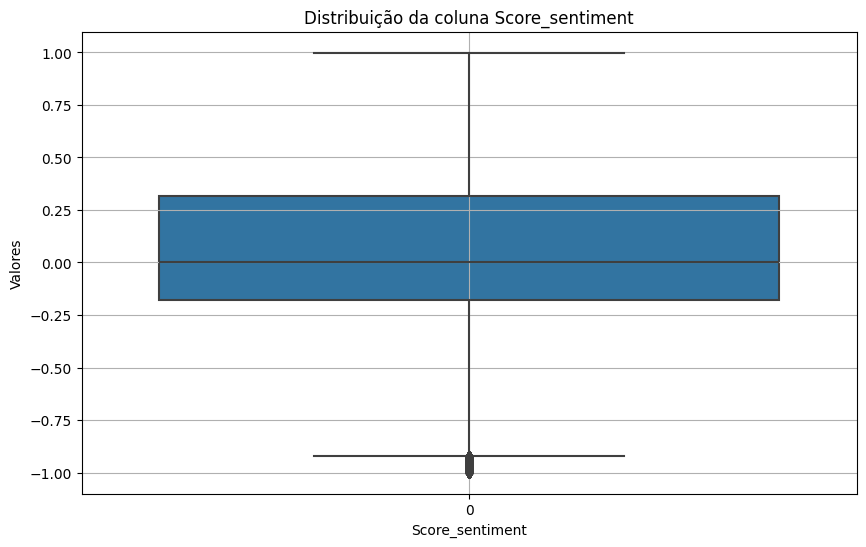

In [ ]:
df_boxplot = df_limpo.copy()

# Visualização com boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot['score_sentiment'])
plt.title('Distribuição da coluna Score_sentiment')
plt.xlabel('Score_sentiment')
plt.ylabel('Valores')
plt.grid(True)
plt.show()


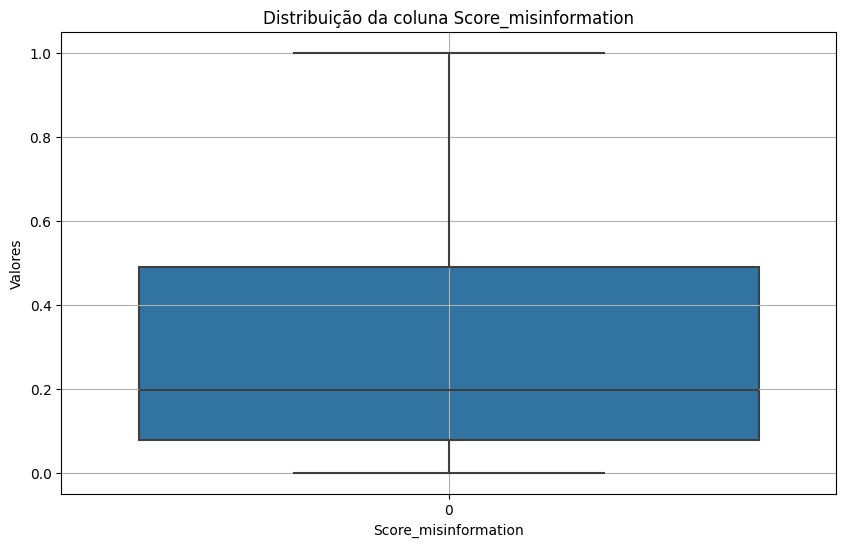

In [ ]:

# Visualização com boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot['score_misinformation'])
plt.title('Distribuição da coluna Score_misinformation')
plt.xlabel('Score_misinformation')
plt.ylabel('Valores')
plt.grid(True)
plt.show()


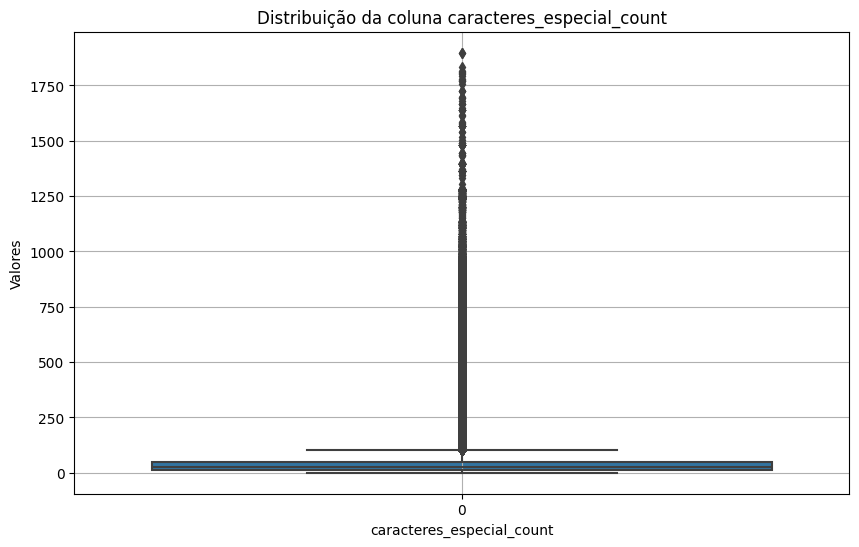

In [ ]:

# Visualização com boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot['caracteres_especial_count'])
plt.title('Distribuição da coluna caracteres_especial_count')
plt.xlabel('caracteres_especial_count')
plt.ylabel('Valores')
plt.grid(True)
plt.show()


### QQ-PLOT verificando se seguem uma distribuição normal 

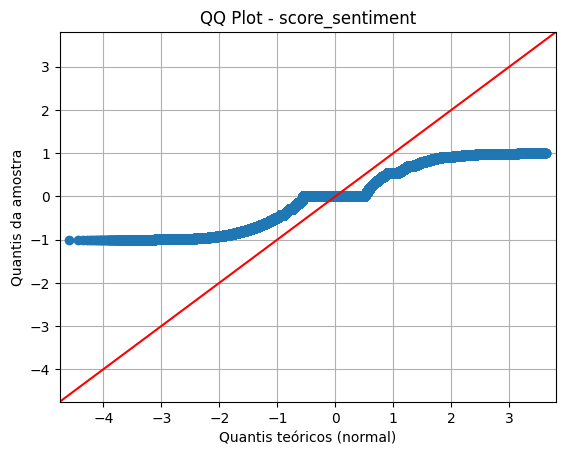

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_qqplot = df_limpo.copy()

sm.qqplot(df_qqplot['score_sentiment'], line='45')  # 'line=45' adiciona uma linha de referência
plt.title('QQ Plot - score_sentiment')
plt.xlabel('Quantis teóricos (normal)')
plt.ylabel('Quantis da amostra')
plt.grid(True)
plt.show()

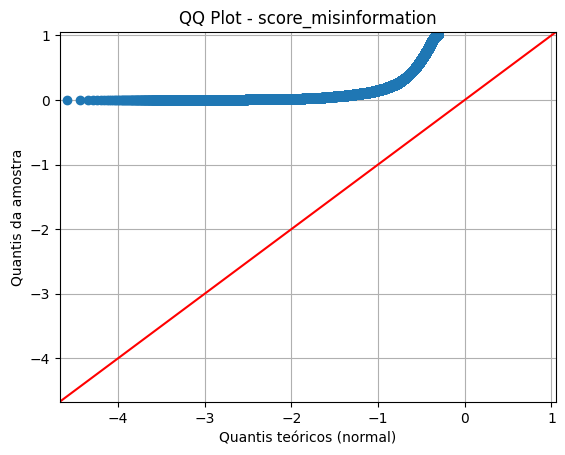

In [ ]:

sm.qqplot(df_qqplot['score_misinformation'], line='45')  # 'line=45' adiciona uma linha de referência
plt.title('QQ Plot - score_misinformation')
plt.xlabel('Quantis teóricos (normal)')
plt.ylabel('Quantis da amostra')
plt.grid(True)
plt.show()

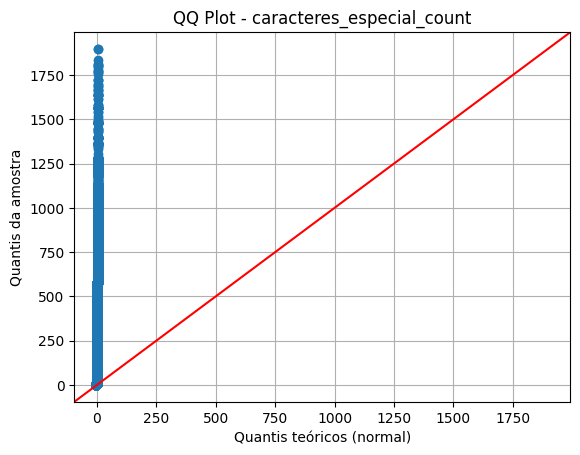

In [ ]:

sm.qqplot(df_qqplot['caracteres_especial_count'], line='45')  
plt.title('QQ Plot - caracteres_especial_count')
plt.xlabel('Quantis teóricos (normal)')
plt.ylabel('Quantis da amostra')
plt.grid(True)
plt.show()

### Teste de normalidade

In [ ]:
df_normalidade = df_limpo.copy()

y = df_normalidade['score_sentiment'].dropna()
z = df_normalidade['score_misinformation'].dropna()
x = df_normalidade['caracteres_especial_count'].dropna()


In [ ]:
from scipy import stats


# Teste de Shapiro-Wilk
shapiro_stat_senti, shapiro_p_senti = stats.shapiro(y)
print(f"Shapiro-Wilk coluna score_sentiment:     estatística={shapiro_stat_senti:.4f}, p-valor={shapiro_p_senti:.4f}")


shapiro_stat_mis, shapiro_p_mis = stats.shapiro(z)
print(f"Shapiro-Wilk coluna score_misinformation:     estatística={shapiro_stat_mis:.4f}, p-valor={shapiro_p_mis:.4f}")

shapiro_stat, shapiro_p = stats.shapiro(x)
print(f"Shapiro-Wilk coluna caracteres_especial_count:     estatística={shapiro_stat:.4f}, p-valor={shapiro_p:.4f}")

# os p-valores são menores que 0.05, rejeitando a hipótese nula 
# de que os dados seguem uma distribuição normal.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk coluna score_sentiment:     estatística=0.9399, p-valor=0.0000
Shapiro-Wilk coluna score_misinformation:     estatística=0.8556, p-valor=0.0000
Shapiro-Wilk coluna caracteres_especial_count:     estatística=0.4100, p-valor=0.0000


### Melhor distribuição - Verificando qual a melhor distribuição para os dados

In [ ]:
! pip install fitter


     ---------------------------------------- 61.6/61.6 kB 3.4 MB/s eta 0:00:00


2025-05-19 21:58:48.372 | WARNING  | fitter.fitter:plot_pdf:419 - burr was not fitted. no parameters available
2025-05-19 21:58:48.380 | WARNING  | fitter.fitter:plot_pdf:419 - gamma was not fitted. no parameters available


sumsquare_error         aic         bic    kl_div  ks_statistic  \
norm          393.781886  188.877134  210.880163  0.949282      0.209087   
uniform       399.688391  142.549420  164.552449  0.674933      0.209779   
pareto        408.812632  205.950841  238.955385  0.794181      0.335366   
burr                 inf         inf         inf       inf           NaN   
gamma                inf         inf         inf       inf           NaN   

         ks_pvalue  
norm           0.0  
uniform        0.0  
pareto         0.0  
burr           NaN  
gamma          NaN

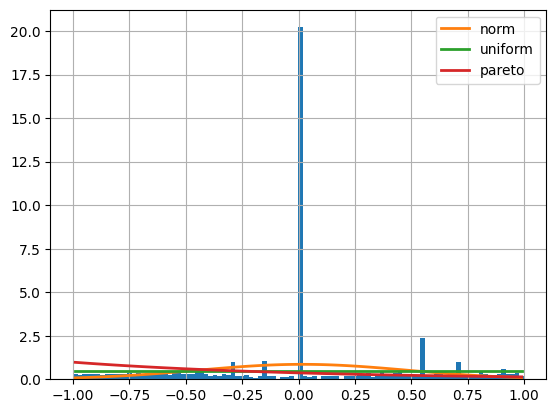

In [ ]:
from fitter import Fitter

df_melhor_dist = df_limpo.copy()
score_sentiment = df_melhor_dist['score_sentiment'].dropna().values

f = Fitter(score_sentiment,
           distributions=["gamma",
                          "lognorm",
                          "rayleigh"
                          "beta",
                          "burr",
                          "norm",
                          "pareto",
                          "uniform"])
f.fit()
f.summary()



In [ ]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.017366045264554802, 'scale': 0.4647201473181575}}

2025-05-21 16:57:07.546 | WARNING  | fitter.fitter:plot_pdf:419 - burr was not fitted. no parameters available
2025-05-21 16:57:07.924 | WARNING  | fitter.fitter:plot_pdf:419 - gamma was not fitted. no parameters available


sumsquare_error        aic         bic    kl_div  ks_statistic  \
pareto         16.642990  93.450239  123.531023  0.066140      0.048709   
norm           80.513438  80.189203  100.243059  0.274161      0.155655   
uniform        80.601343   3.999342   24.053198  0.282486      0.321869   
burr                 inf        inf         inf       inf           NaN   
gamma                inf        inf         inf       inf           NaN   

         ks_pvalue  
pareto         0.0  
norm           0.0  
uniform        0.0  
burr           NaN  
gamma          NaN

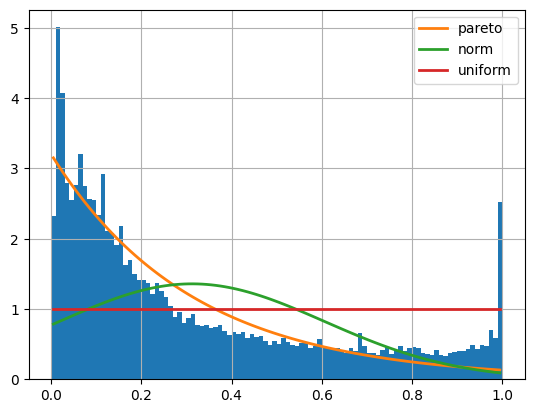

In [5]:
from fitter import Fitter


df_melhor_dist = df_limpo.copy()
score_misinformation = df_melhor_dist['score_misinformation'].dropna().values

f = Fitter(score_misinformation,
           distributions=["gamma",
                          "lognorm",
                          "rayleigh"
                          "beta",
                          "burr",
                          "norm",
                          "pareto",
                          "uniform"])
f.fit()
f.summary()



In [ ]:
f.get_best(method = 'sumsquare_error')

{'pareto': {'b': 53723512.67777945,
  'loc': -16777215.999996727,
  'scale': 16777216.0}}

2025-05-17 15:28:25.238 | WARNING  | fitter.fitter:plot_pdf:419 - burr was not fitted. no parameters available
2025-05-17 15:28:25.247 | WARNING  | fitter.fitter:plot_pdf:419 - gamma was not fitted. no parameters available


{'pareto': {'b': 2.448725791950652,
  'loc': -74.03733717286617,
  'scale': 74.03733717286616}}

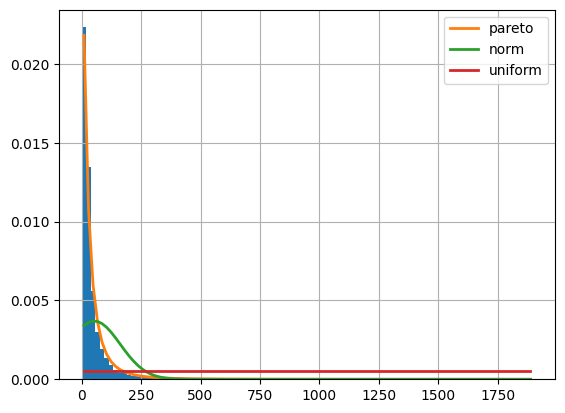

In [ ]:
from fitter import Fitter

score_sentiment = df_limpo['caracteres_especial_count'].dropna().values

f = Fitter(score_sentiment,
           distributions=["gamma",
                          "lognorm",
                          "rayleigh"
                          "beta",
                          "burr",
                          "norm",
                          "pareto",
                          "uniform"])
f.fit()
f.summary()

f.get_best(method = 'sumsquare_error')

In [ ]:

df_limpo.dropna(subset=['score_sentiment'], inplace=True)


In [ ]:
df_limpo.dropna(subset=['score_misinformation'], inplace=True)


In [ ]:
df_limpo[['score_sentiment', 'score_misinformation']]

score_sentiment  score_misinformation
2               -0.3551              0.157242
4                0.7003              0.197813
5                0.9716              0.974258
6               -0.8779              0.035876
7               -0.9423              0.934309
...                 ...                   ...
443098           0.7506              0.494733
443102           0.7506              0.494733
443108           0.8456              0.003677
443109           0.5267              0.034700
443118           0.6369              0.045459

[167197 rows x 2 columns]

### Coeficiente de correlação

In [ ]:
# Matriz de correlação

df_corr = df_limpo.copy()

# Selecionar features numéricas
numeric_features = df_corr[['score_sentiment', 'score_misinformation', 'caracteres_especial_count']]

# Matriz de correlação de Spearman
corr_matrix_spearman = numeric_features.corr(method='spearman')
corr_matrix_pearson = numeric_features.corr(method='pearson')

# Exibir a matriz de Spearman
print("Matriz de Correlação - Spearman")
print(corr_matrix_spearman)


# Exibir a matriz de Pearson
print("Matriz de Correlação - pearson")
print(corr_matrix_pearson)



Matriz de Correlação - Spearman
                           score_sentiment  score_misinformation  \
score_sentiment                   1.000000             -0.388516   
score_misinformation             -0.388516              1.000000   
caracteres_especial_count        -0.014279              0.126299   

                           caracteres_especial_count  
score_sentiment                            -0.014279  
score_misinformation                        0.126299  
caracteres_especial_count                   1.000000  
Matriz de Correlação - pearson
                           score_sentiment  score_misinformation  \
score_sentiment                   1.000000             -0.356182   
score_misinformation             -0.356182              1.000000   
caracteres_especial_count        -0.074665              0.239832   

                           caracteres_especial_count  
score_sentiment                            -0.074665  
score_misinformation                        0.239832  
caract

### Gráfico de dispersão

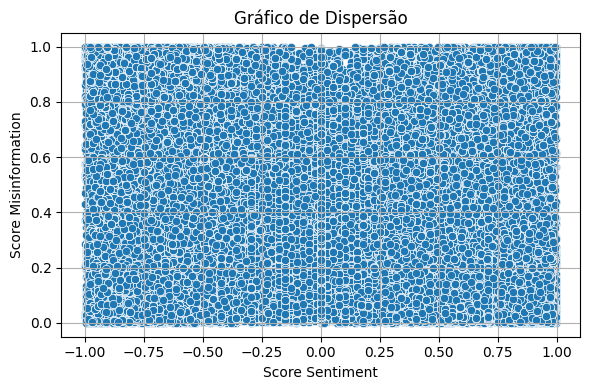

In [ ]:
# Gráfico de dispersão
import seaborn as sns
import matplotlib.pyplot as plt

df_disp = df_limpo.copy()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_disp, x=df_disp['score_sentiment'], y=df_disp['score_misinformation'])
plt.title("Gráfico de Dispersão")
plt.xlabel("Score Sentiment")
plt.ylabel("Score Misinformation")
plt.grid(True)
plt.tight_layout()
plt.show()


### V de Cramer

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

df_v_cramer = df_limpo.copy()

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    r, k = confusion_matrix.shape
    if min(k, r) <= 1:
        print(f"[AVISO] Ignorando par com min(k, r) <= 1: {x.name} x {y.name}")
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

categorical_cols = ['media_type', 'has_media', 'trava_zap', 'message_type', 'has_media_url']
results = {}

# Preencher NaN e converter booleanos

for col in categorical_cols:
    df_v_cramer[col] = df_v_cramer[col].fillna('missing').astype(str)

# Recalcular V de Cramér
results = {}
for i, col1 in enumerate(categorical_cols):
    for col2 in categorical_cols[i+1:]:
        v = cramers_v(df_v_cramer[col1], df_v_cramer[col2])
        results[(col1, col2)] = v

# Mostrar ordenado
for pair, v in sorted(results.items(), key=lambda x: -x[1]):
    print(f'{pair[0]} x {pair[1]}: V = {v:.3f}')

[AVISO] Ignorando par com min(k, r) <= 1: media_type x trava_zap
[AVISO] Ignorando par com min(k, r) <= 1: has_media x trava_zap
[AVISO] Ignorando par com min(k, r) <= 1: trava_zap x message_type
[AVISO] Ignorando par com min(k, r) <= 1: trava_zap x has_media_url
media_type x has_media: V = 1.000
media_type x trava_zap: V = nan
media_type x message_type: V = 0.950
media_type x has_media_url: V = 0.744
has_media x trava_zap: V = nan
has_media x message_type: V = 1.000
has_media x has_media_url: V = 0.471
trava_zap x message_type: V = nan
trava_zap x has_media_url: V = nan
message_type x has_media_url: V = 0.743


Todos que comparerem com Trava/zap vai dá NaN pois só tem um valor nessa coluna

In [ ]:

df_quantidade = df_limpo.copy()


### Quantidade de grupos e usuários e mensagens

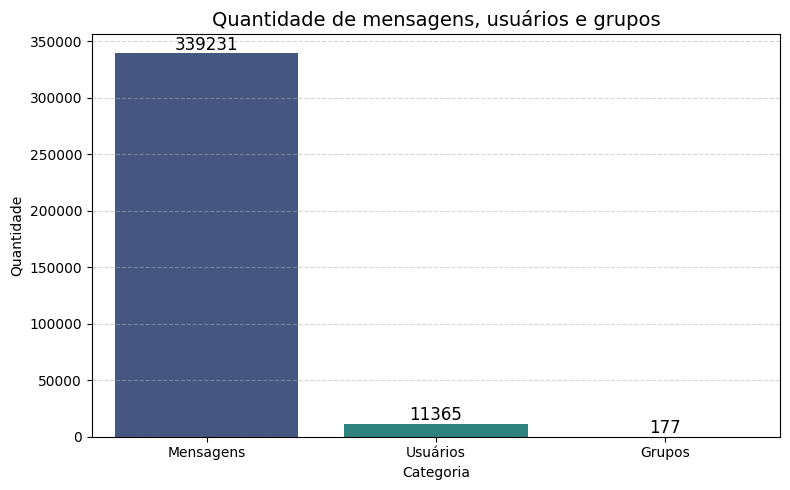

In [ ]:


df_quantidade = df_quantidade.dropna(subset=['text_content_preprocessado'])

# Quantidade de mensagens (linhas)
num_mensagens = df_quantidade['text_content_preprocessado'].apply(lambda x: isinstance(x, str) and x.strip() != '').sum()
# Quantidade de usuários únicos
num_usuarios = df_quantidade['id_member_anonymous'].nunique()
# Quantidade de grupos únicos
num_grupos = df_quantidade['id_group_anonymous'].nunique()


# Dados em DataFrame
dados = pd.DataFrame({
    'Categoria': ['Mensagens', 'Usuários', 'Grupos'],
    'Quantidade': [num_mensagens, num_usuarios, num_grupos]
})

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=dados, x='Categoria', y='Quantidade', palette='viridis')

# Adicionar valores nas barras
for i, row in dados.iterrows():
    plt.text(i, row['Quantidade'] + max(dados['Quantidade'])*0.01, str(row['Quantidade']), 
             ha='center', fontsize=12)

plt.title('Quantidade de mensagens, usuários e grupos', fontsize=14)
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### A quantidade de mensagens que possuem apenas texto X mídia; 

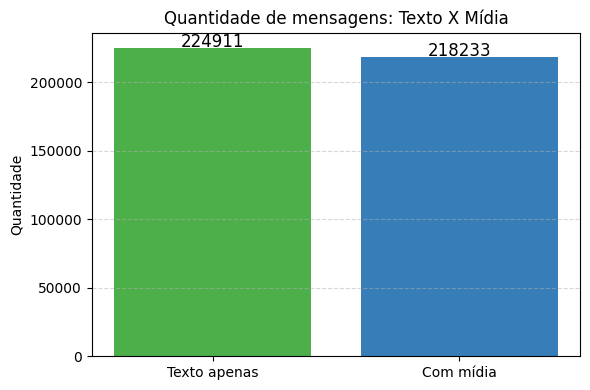

In [ ]:

# Contagem com base na coluna 'has_media'
contagem_midia = df_quantidade['has_media'].value_counts()

# Renomear os índices para o gráfico
labels = ['Texto apenas', 'Com mídia'] if True in contagem_midia.index else ['Texto apenas']

# Gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(labels, contagem_midia.values, color=['#4daf4a', '#377eb8'])

for i, valor in enumerate(contagem_midia.values):
    plt.text(i, valor + 1000, str(valor), ha='center', fontsize=12)

plt.title('Quantidade de mensagens: Texto X Mídia')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Quantidade de mensagens por tipo de mídia (jpg, mp4 etc); 

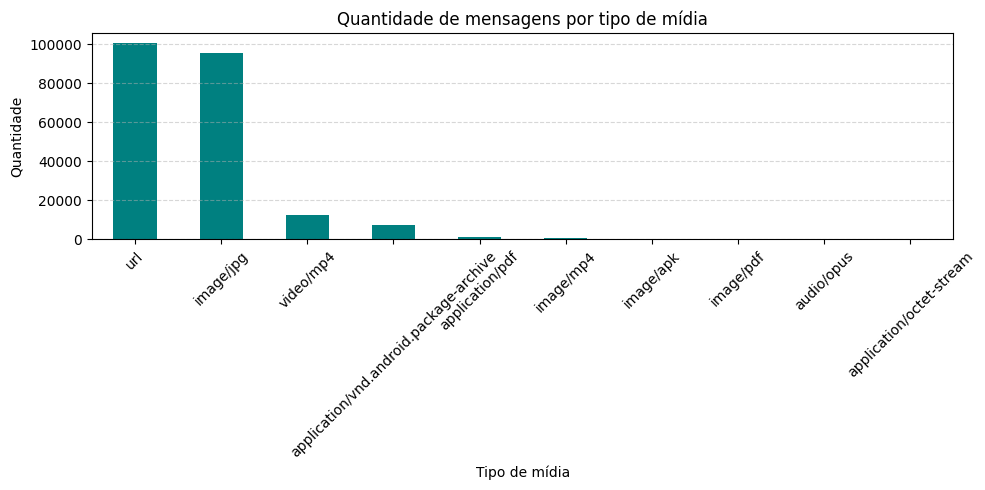

In [ ]:
# Quantidade de mensagens por tipo de mídia (jpg, mp4 etc); 

# Contar tipos de mídia (remover nulos)
tipos_midia = df_quantidade['media_type'].dropna().value_counts().head(10)  # mostra os 10 principais tipos

# Gráfico
plt.figure(figsize=(10, 5))
tipos_midia.plot(kind='bar', color='teal')

plt.title('Quantidade de mensagens por tipo de mídia')
plt.ylabel('Quantidade')
plt.xlabel('Tipo de mídia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df_quantidade['message_type'].value_counts()

message_type
Texto          224911
Url            100856
Imagem          96585
Video           12438
Application      8262
Audio              87
Image               4
Text                1
Name: count, dtype: int64

### A relação entre a quantidade de mensagens e a quantidade de palavras presente nas mensagens; 

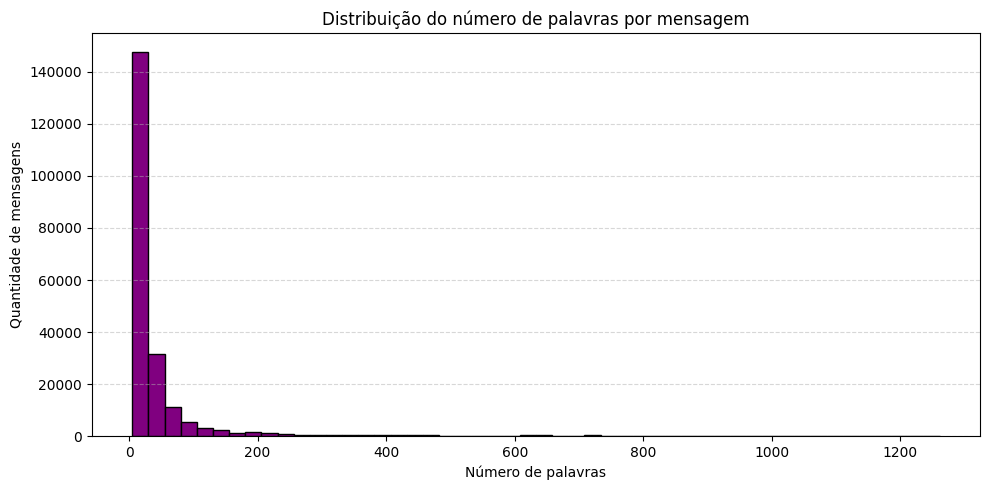

In [ ]:
# A relação entre a quantidade de mensagens e a quantidade de palavras presente nas mensagens; 

# Filtrar apenas mensagens de texto válidas
df_texto = df_limpo[df_limpo['message_type'] == 'Texto'].copy()
df_texto = df_texto.dropna(subset=['text_content_preprocessado'])

# Criar coluna com número de palavras
df_texto['qtd_palavras'] = df_texto['text_content_preprocessado'].apply(lambda x: len(str(x).split()))

# Histograma
plt.figure(figsize=(10, 5))
plt.hist(df_texto['qtd_palavras'], bins=50, color='purple', edgecolor='black')
plt.title('Distribuição do número de palavras por mensagem')
plt.xlabel('Número de palavras')
plt.ylabel('Quantidade de mensagens')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### As 30 URLs que mais se repetem (mais compartilhadas); 

C:\Users\ACER\AppData\Local\Temp\ipykernel_13120\3646833210.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


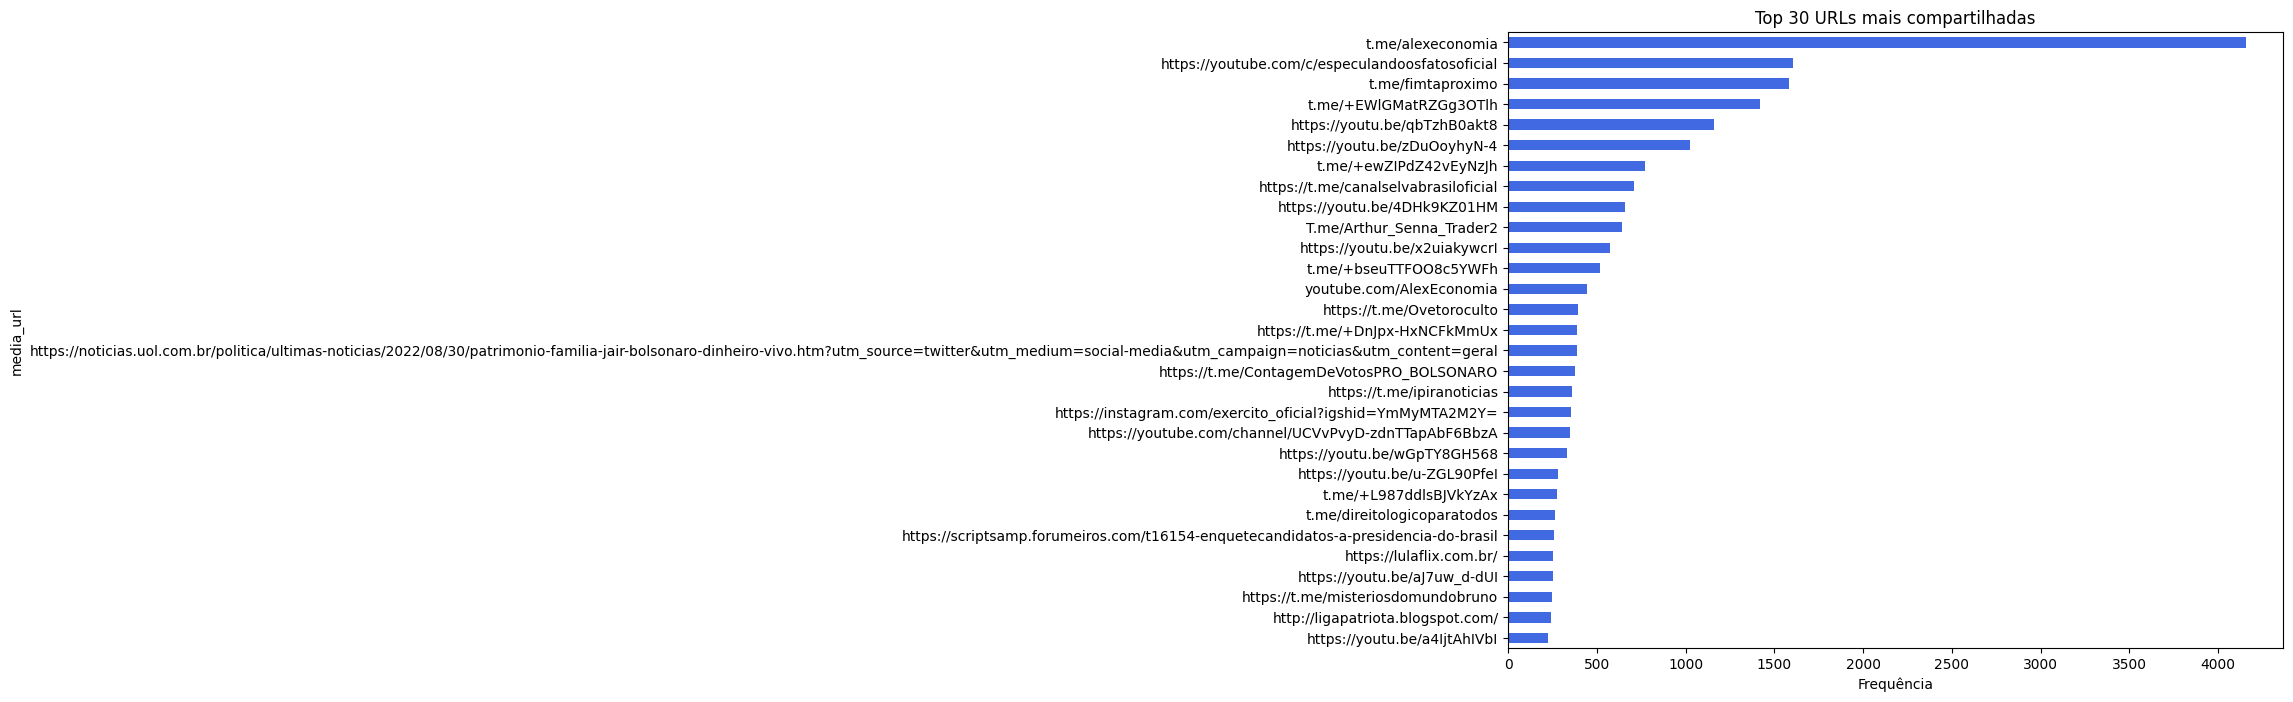

In [ ]:
# As 30 URLs que mais se repetem (mais compartilhadas); 


# Contar as URLs não nulas
urls_mais_comuns = df_quantidade['media_url'].dropna().value_counts().head(30)

# Gráfico
plt.figure(figsize=(10, 8))
urls_mais_comuns.plot(kind='barh', color='royalblue')
plt.gca().invert_yaxis()  # coloca a URL mais compartilhada no topo
plt.title('Top 30 URLs mais compartilhadas')
plt.xlabel('Frequência')
plt.tight_layout()
plt.show()


### Os 30 domínios que mais se repetem (mais compartilhados); 


In [ ]:
from urllib.parse import urlparse

# Filtrar linhas com URL válida
df_urls = df_limpo.dropna(subset=['media_url']).copy()

# Extrair domínio da URL
df_urls['dominio'] = df_urls['media_url'].apply(lambda url: urlparse(url).netloc)

# Agrupar e calcular métricas por domínio
dominio_stats = df_urls.groupby('dominio').agg(
    total_compartilhamentos=('media_url', 'count'),
    urls_unicas=('media_url', pd.Series.nunique),
    usuarios_unicos=('id_member_anonymous', pd.Series.nunique)
)

# Selecionar os 30 domínios mais compartilhados
top_dominios = dominio_stats.sort_values(by='total_compartilhamentos', ascending=False).head(30)

# Mostrar DataFrame final organizado
top_dominios.reset_index(inplace=True)
top_dominios.head(30)


dominio  total_compartilhamentos  urls_unicas  \
0                          youtu.be                    52731        15214   
1                                                      12406          450   
2                              t.me                    10715         2271   
3                   www.youtube.com                     8315         3232   
4           terrabrasilnoticias.com                     8282         2717   
5                       youtube.com                     5967         2086   
6                 www.instagram.com                     5784         4138   
7   www.jornaldacidadeonline.com.br                     4829          811   
8                       twitter.com                     4390         3202   
9               gazetabrasil.com.br                     1779          965   
10                       pleno.news                     1601          727   
11                 www.facebook.com                     1356          945   
12                 www.bitchute.com                     1178          169   
13  www.aliadosbrasiloficial.com.br                      945          359   
14                 revistaoeste.com                      921          469   
15                   kwai-video.com                      863          787   
16                        gettr.com                      842          592   
17               vistapatria.com.br                      830          276   
18          verdadecensurada.com.br                      829          163   
19                    instagram.com                      822          265   
20       www.conexaopolitica.com.br                      746          387   
21                    vm.tiktok.com                      744          699   
22                    m.youtube.com                      688          310   
23              noticias.uol.com.br                      627          176   
24           tribunanacional.com.br                      609          130   
25                         fb.watch                      573          439   
26             www.apostagem.com.br                      568          566   
27                       rumble.com                      531          298   
28                veja.abril.com.br                      506          151   
29      redemption3301.blogspot.com                      494          410   

    usuarios_unicos  
0              2194  
1               295  
2               956  
3               545  
4               252  
5               389  
6               594  
7               219  
8               526  
9                87  
10               79  
11              200  
12               27  
13               53  
14              101  
15               83  
16              119  
17               67  
18               25  
19              189  
20               55  
21               91  
22               98  
23               59  
24               27  
25              152  
26                0  
27               79  
28               98  
29                1

### Os 30 usuários mais ativos; 

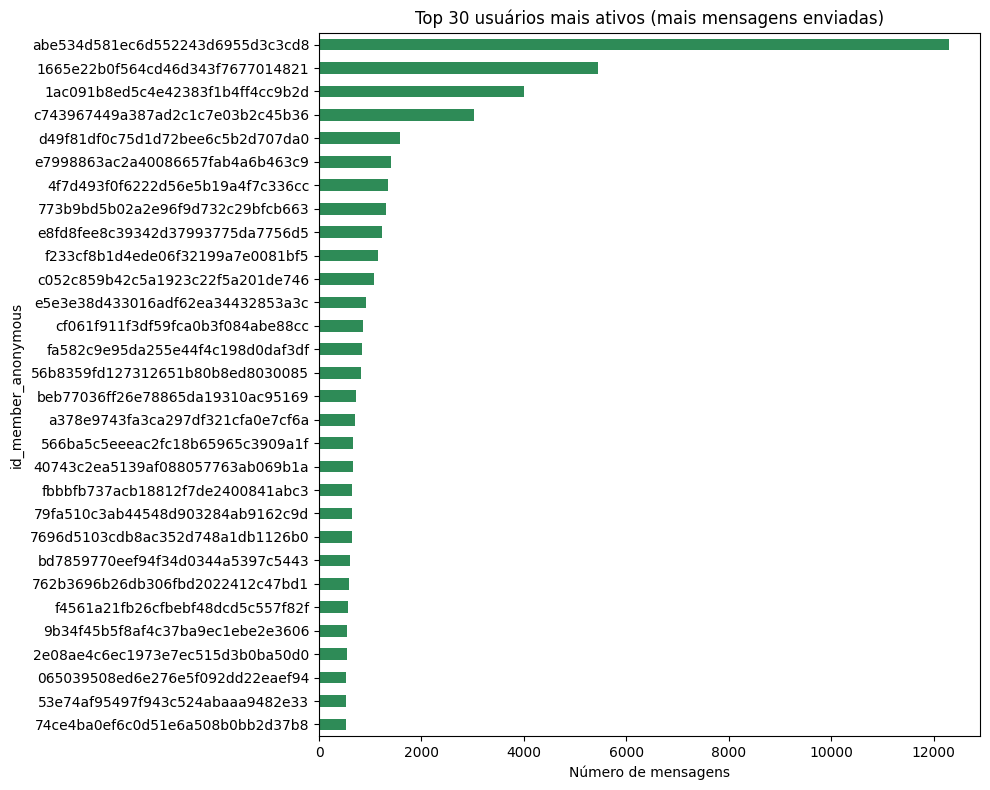

In [ ]:
# Os 30 usuários mais ativos; 
usuarios_mais_ativos = df_quantidade['id_member_anonymous'].value_counts().head(30)

# Gráfico
plt.figure(figsize=(10, 8))
usuarios_mais_ativos.plot(kind='barh', color='seagreen')
plt.gca().invert_yaxis()
plt.title('Top 30 usuários mais ativos (mais mensagens enviadas)')
plt.xlabel('Número de mensagens')
plt.tight_layout()
plt.show()


### Relação entre quantidade de mensagens contendo somente texto e mensagens contendo mídia dos usuários mais ativos: 


C:\Users\ACER\AppData\Local\Temp\ipykernel_13120\1588324602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_users['tipo_msg'] = df_top_users['has_media'].apply(lambda x: 'Mídia' if x else 'Texto')


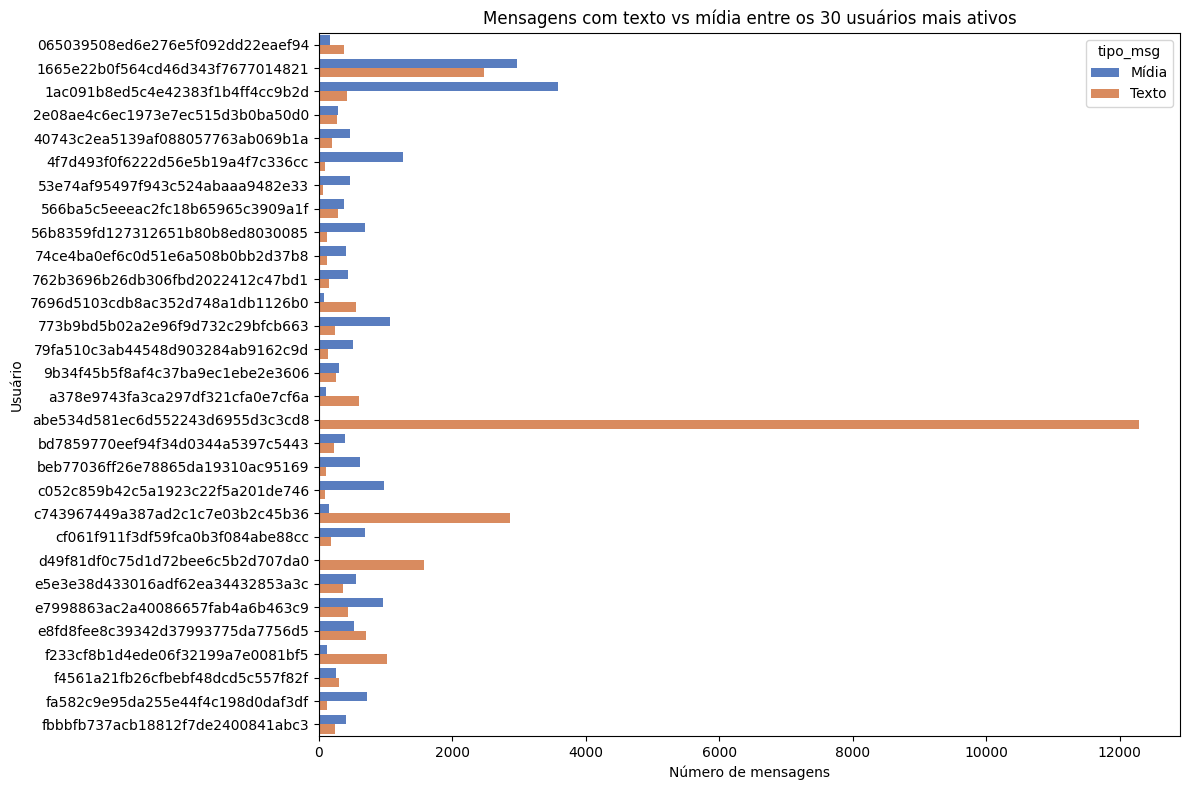

In [ ]:
# Relação entre quantidade de mensagens contendo somente texto e mensagens com tendo mídia dos usuários mais ativos: 

import seaborn as sns
import pandas as pd

# Pegar top 30 usuários
top_usuarios = df_quantidade['id_member_anonymous'].value_counts().head(30).index

# Filtrar o dataframe para os top usuários
df_top_users = df_quantidade[df_quantidade['id_member_anonymous'].isin(top_usuarios)]

# Classificar como "Texto" ou "Mídia"
df_top_users['tipo_msg'] = df_top_users['has_media'].apply(lambda x: 'Mídia' if x else 'Texto')

# Contar por usuário e tipo de mensagem
contagem = df_top_users.groupby(['id_member_anonymous', 'tipo_msg']).size().reset_index(name='quantidade')

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=contagem, x='quantidade', y='id_member_anonymous', hue='tipo_msg', palette='muted')
plt.title('Mensagens com texto vs mídia entre os 30 usuários mais ativos')
plt.xlabel('Número de mensagens')
plt.ylabel('Usuário')
plt.tight_layout()
plt.show()


### Os 30 usuários que mais compartilharam texto; 

                             usuario  quantidade_texto
0   abe534d581ec6d552243d6955d3c3cd8             12289
1   c743967449a387ad2c1c7e03b2c45b36              2867
2   1665e22b0f564cd46d343f7677014821              2480
3   d49f81df0c75d1d72bee6c5b2d707da0              1571
4   f233cf8b1d4ede06f32199a7e0081bf5              1022
5   e8fd8fee8c39342d37993775da7756d5               699
6   a378e9743fa3ca297df321cfa0e7cf6a               598
7   7696d5103cdb8ac352d748a1db1126b0               560
8   26b496125c8b6773bce453e14f172430               502
9   7d41f1a2df245b0cc870f546c2aead0b               483
10  b4ce87d44421ef3d2c4710051df5fe40               478
11  e7998863ac2a40086657fab4a6b463c9               430
12  1ac091b8ed5c4e42383f1b4ff4cc9b2d               428
13  22722eeb9ae4be8f45581e69eb707be4               409
14  a398999c55f8d6f0c65760522ae12e45               402
15  065039508ed6e276e5f092dd22eaef94               373
16  39ee10516124280a22f1798f2a41f9a7               372
17  e5e3e3

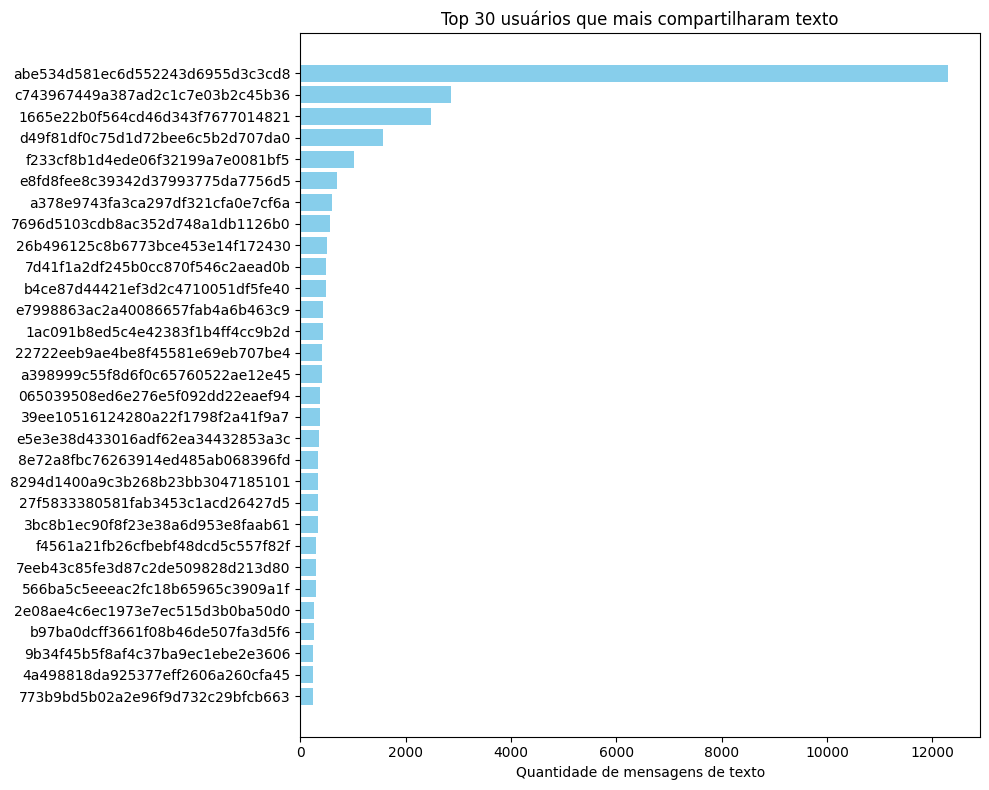

In [ ]:
# Os 30 usuários que mais compartilharam texto; 


df_texto = df_quantidade[df_quantidade['message_type'] == 'Texto']


usuarios_texto = df_texto['id_member_anonymous'].value_counts().head(30).reset_index()
usuarios_texto.columns = ['usuario', 'quantidade_texto']

print(usuarios_texto)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(usuarios_texto['usuario'], usuarios_texto['quantidade_texto'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Quantidade de mensagens de texto')
plt.title('Top 30 usuários que mais compartilharam texto')
plt.tight_layout()
plt.show()


### Os 30 usuários que mais compartilharam mídias; 

                             usuario  quantidade_midia
0   1ac091b8ed5c4e42383f1b4ff4cc9b2d              3577
1   1665e22b0f564cd46d343f7677014821              2972
2   4f7d493f0f6222d56e5b19a4f7c336cc              1266
3   773b9bd5b02a2e96f9d732c29bfcb663              1067
4   c052c859b42c5a1923c22f5a201de746               979
5   e7998863ac2a40086657fab4a6b463c9               967
6   fa582c9e95da255e44f4c198d0daf3df               723
7   56b8359fd127312651b80b8ed8030085               698
8   cf061f911f3df59fca0b3f084abe88cc               687
9   beb77036ff26e78865da19310ac95169               618
10  e5e3e38d433016adf62ea34432853a3c               549
11  e8fd8fee8c39342d37993775da7756d5               525
12  79fa510c3ab44548d903284ab9162c9d               513
13  40743c2ea5139af088057763ab069b1a               472
14  53e74af95497f943c524abaaa9482e33               468
15  9794a13f91433216821ad18624372498               458
16  5d321b03e74b751ac577ef022350306d               453
17  3f64a6

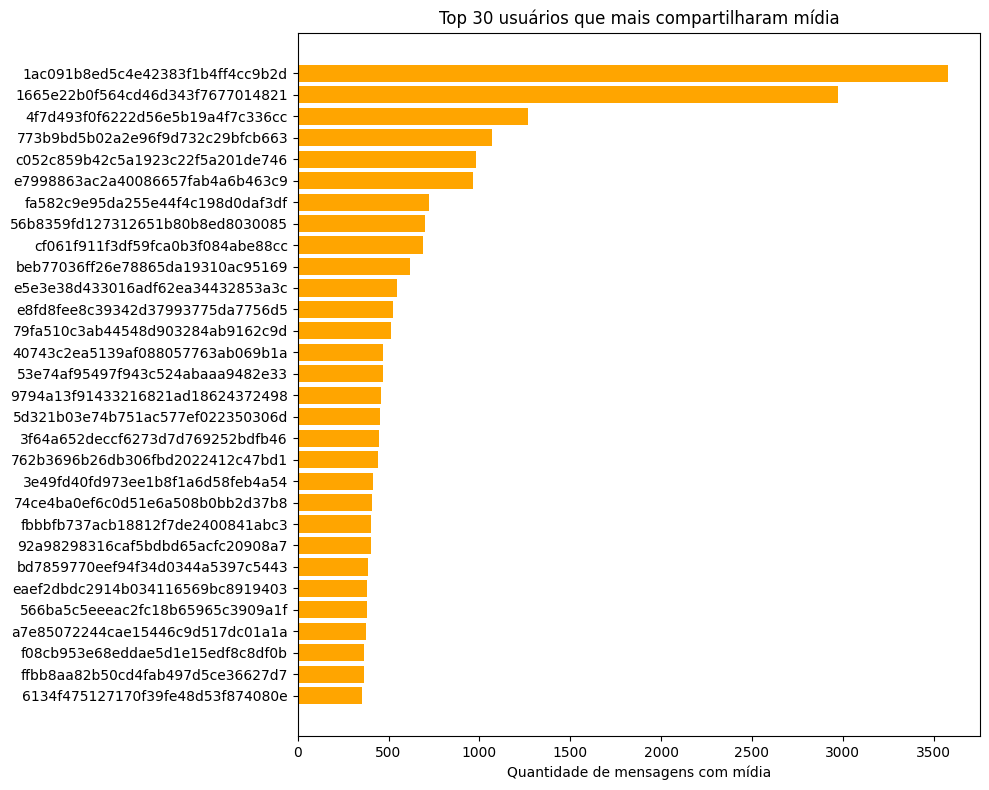

In [ ]:
# Os 30 usuários que mais compartilharam mídias; 


df_midia = df_quantidade[df_quantidade['has_media'] == True]

usuarios_midia = df_midia['id_member_anonymous'].value_counts().head(30).reset_index()
usuarios_midia.columns = ['usuario', 'quantidade_midia']

print(usuarios_midia)


plt.figure(figsize=(10, 8))
plt.barh(usuarios_midia['usuario'], usuarios_midia['quantidade_midia'], color='orange')
plt.gca().invert_yaxis()
plt.xlabel('Quantidade de mensagens com mídia')
plt.title('Top 30 usuários que mais compartilharam mídia')
plt.tight_layout()
plt.show()


### As 30 mensagens mais compartilhadas;

In [ ]:
df_quantidade.head()

Unnamed: 0         date_message               id_member_anonymous  \
0           0  2022-10-05 06:25:04  1078cc958f0febe28f4d03207660715f   
1           1  2022-10-05 06:25:08                               NaN   
2           2  2022-10-05 06:26:28  92a2d8fd7144074f659d1d29dc3751da   
3           3  2022-10-05 06:27:28  d60aa38f62b4977426b70944af4aff72   
4           5  2022-10-05 06:28:30                               NaN   

                 id_group_anonymous                                 media  \
0  12283e08a2eb5789201e105b34489ee7                                   NaN   
1  12283e08a2eb5789201e105b34489ee7                                   NaN   
2  9f2d7394334eb224c061c9740b5748fc                                   NaN   
3  c8f2de56550ed0bf85249608b7ead93d  94dca4cda503100ebfda7ce2bcc060eb.jpg   
4  b52442a5fbc459ae590dca0d215e32f9                                   NaN   

  media_type media_url  has_media  has_media_url  trava_zap  ...  \
0        NaN       NaN      False          False      False  ...   
1        NaN       NaN      False          False      False  ...   
2        NaN       NaN      False          False      False  ...   
3  image/jpg       NaN       True          False      False  ...   
4        NaN       NaN      False          False      False  ...   

                  date_system  score_sentiment score_misinformation  \
0  2022-10-05 06:25:28.863641           0.0000                  NaN   
1  2022-10-05 06:25:28.926311           0.0644                  NaN   
2  2022-10-05 06:26:29.361949          -0.3551             0.157242   
3  2022-10-05 06:27:29.935624           0.0000                  NaN   
4  2022-10-05 06:29:29.046694           0.7003             0.197813   

   id_message  message_type  messenger media_name  \
0       16385         Texto   telegram        NaN   
1       16386         Texto   telegram        NaN   
2       16366         Texto   telegram        NaN   
3       19281        Imagem   telegram        NaN   
4        2735         Texto   telegram        NaN   

                          media_md5 caracteres_especial_count  \
0                               NaN                        24   
1                               NaN                        29   
2                               NaN                        77   
3  94dca4cda503100ebfda7ce2bcc060eb                         8   
4                               NaN                        37   

                          text_content_preprocessado  
0  então é fato renato o áudio que eu ouvi no wha...  
1  saiu no youtube do presidente a 8 horas atrás,...  
2  é isso, nossa parte já foi quase toda feita. n...  
3           gente achei eles em uma seita maçonárica  
4  kķkk to rindo até agora..quem disse q ia fazer...  

[5 rows x 22 columns]

In [ ]:
# As 30 mensagens mais compartilhadas;

mensagens_mais_compartilhadas = df_quantidade['text_content_preprocessado'].value_counts().head(30).reset_index()
mensagens_mais_compartilhadas.columns = ['text_content_preprocessado', 'quantidade_compartilhamentos']

mensagens_mais_compartilhadas


text_content_preprocessado  \
0   this community was blocked in brazil following...   
1   سکس مردان ازبک با زن انگلیسی با این vpn از سای...   
2   فیلم سوپر با زیرنویس فارسی ببین😍😍\nبا این فیلت...   
3   we had no choice but to remain in the shadows....   
4                     t.me\nselva brasil oficial 🇧🇷🇧🇷   
5   "e conhecereis a verdade, e a verdade vos libe...   
6   🇮🇷 سکس با دختر 14 ساله را در سایتهای پورن\nبیی...   
7   bem vindo(a) ao grupo ipirá notícias. \n\ncomp...   
8                      vídeo de avany ferreira muller   
9                    vídeo de maria teresa d  valente   
10  para quem gosta de medicina natural, esse é, s...   
11                    foto de maria teresa d  valente   
12  o meu amigo não sou infiltrado .. meu voto foi...   
13                           vídeo de r a s g a n d o   
14  grupo para organizar 200 mil eleitores do bols...   
15  nossa! este vídeo é muito engraçado!\nkwai-vid...   
16  invista conosco e receba✅\n seu lucro está seg...   
17  boa noite a todos. o que eu vou dizer é sério ...   
18  regras do grupo \n\n1° regra do grupo é respei...   
19  🌒 encerrar modo noturno\n\n✅ de agora em diant...   
20  notícia de dentro do quartel. os militares já ...   
21      pleno.news\n\nt.me\nselva brasil oficial 🇧🇷🇧🇷   
22  🚨pessoal, estamos correndo contra o tempo para...   
23                 vídeo de jane m.a.coletti ☺️🇧🇷🇧🇷🇧🇷   
24                 vídeo de maria emilia gadelha serr   
25  desculpa, pessoal, eu sei que esse pode não se...   
26  *vamos seguir o instagram do exército brasilei...   
27      esta notícia me deixa triste!\nkwai-video.com   
28  já que lula colocou um milhão no podcast do fl...   
29                    vídeo de paulo roberto schuster   

    quantidade_compartilhamentos  
0                          17422  
1                           1019  
2                            632  
3                            480  
4                            468  
5                            426  
6                            400  
7                            358  
8                            195  
9                            189  
10                           186  
11                           184  
12                           172  
13                           171  
14                           152  
15                           138  
16                           130  
17                           127  
18                           127  
19                           117  
20                           116  
21                           108  
22                           107  
23                           105  
24                           103  
25                            99  
26                            98  
27                            97  
28                            97  
29                            97

### As 30 mensagens mais compartilhadas em grupos diferentes; 


In [ ]:
# As 30 mensagens mais compartilhadas em grupos diferentes; 

mensagens_grupos = df_quantidade.groupby('text_content_preprocessado')['id_group_anonymous'].nunique().sort_values(ascending=False).head(30).reset_index()
mensagens_grupos.columns = ['text_content_preprocessado', 'quantidade_grupos']

mensagens_grupos

text_content_preprocessado  quantidade_grupos
0   this community was blocked in brazil following...                 59
1   boa noite a todos. o que eu vou dizer é sério ...                 36
2   hoje às 18 horas no canal inteligência ltda do...                 35
3   de nada irá adiantar fiscalizar as urnas, se n...                 29
4   ajudem a subir a #janonesamigodepedofilo\n\npo...                 29
5   os ptistas não quer que agente mostre que voto...                 29
6   *atenção* \n🚨🚨\n\n*chamada urgente* patriotas ...                 29
7   brasileiros, pior de que vocês perderem seus c...                 28
8   os eleitores que ja enviou, não precisa mais e...                 28
9   prezados brasileiros patriotas, \nsaudações,\n...                 27
10  lançaram o lulaflix, uma coletânea com o que d...                 27
11  pessoal, poste seu comprovante de voto.\n\nser...                 27
12            enviando por email requerimento gsi.pdf                 27
13  enviando por email representação - prisão m...                 27
14  enviando por email habeas corpus - stj - povo-...                 27
15  se você acredita que bolsonaro ganhou no prime...                 27
16  queridos amigos patriotas, \n\nsegue o sentime...                 27
17  os grupos 'meu voto é bolsonaro 22' ficaram ab...                 27
18  quando estiver zero membroaqui, teremos a cert...                 26
19  - contra tudo e contra todos, tivemos no 1° tu...                 26
20  contagem pública de votos pro bolsonaro22 2⁰ t...                 26
21  convocamos a todos, a participar do grupo de b...                 25
22  o lula é ⓘ 𝘾𝙤𝙢𝙚𝙣𝙩𝙖́𝙧𝙞𝙤 𝙍𝙚𝙢𝙤𝙫𝙞𝙙𝙤 𝙋𝙚𝙡𝙤 𝙏𝙧𝙞𝙗𝙪𝙣𝙖𝙡 ...                 25
23  nossa! este vídeo é muito engraçado!\nkwai-vid...                 25
24  pessoal, se você acredita que bolsonaro ganhou...                 25
25  queridos patríotas, essa é a nossa segunda e ú...                 25
26  o foco do nosso trabalho, são os comprovantes ...                 25
27  atenção !! alerta a todos!!\n\na esquerda esta...                 25
28  bolsonaro bate recorde de lula em podcast!\n\n...                 25
29  >importante<\n\ngostariamos de convidar você a...                 25

### Mensagens idênticas compartilhadas pelo mesmo usuário (e suas quantidades); 


In [ ]:


msg_duplicadas = df_limpo.groupby(['id_member_anonymous', 'text_content_preprocessado']).size().reset_index(name='quantidade')

msg_duplicadas_mais = msg_duplicadas[msg_duplicadas['quantidade'] > 1].sort_values(by='quantidade', ascending=False)

msg_duplicadas_mais.head(30)

id_member_anonymous  \
105185  f233cf8b1d4ede06f32199a7e0081bf5   
87321   c743967449a387ad2c1c7e03b2c45b36   
45404   7696d5103cdb8ac352d748a1db1126b0   
7421    1665e22b0f564cd46d343f7677014821   
61109   a398999c55f8d6f0c65760522ae12e45   
19999   2a4827f1d9ac158e15c1db59c038bea8   
100277  e7998863ac2a40086657fab4a6b463c9   
100035  e7998863ac2a40086657fab4a6b463c9   
109475  fba2e18e4328fe3d8029e44c542fe988   
86539   c743967449a387ad2c1c7e03b2c45b36   
41406   6adfedbb5ebea15b89d785ce436f6bc0   
34578   566ba5c5eeeac2fc18b65965c3909a1f   
10997   1665e22b0f564cd46d343f7677014821   
11417   17916aca7f2d50e4f30761dd76986ff6   
105617  f32fb55955515e8a98429f9089df960f   
11148   1665e22b0f564cd46d343f7677014821   
45983   773b9bd5b02a2e96f9d732c29bfcb663   
11169   167db5613cd8235c443146d086ef40aa   
45996   773b9bd5b02a2e96f9d732c29bfcb663   
37871   5f47c8d650969393e25000a927219611   
17247   23d14a50cb82952a04645e779f48206a   
27058   3f64a652deccf6273d7d769252bdfb46   
27268   400ff18531c9aa277eadfd78d5a54a1e   
24481   396c035099bb75f47a1f08f59432f82c   
52460   8b890330b9d851d740d3536ac1567432   
11151   1665e22b0f564cd46d343f7677014821   
94617   d94337b1b8b21dc0cf178886c93d890e   
53297   8e53464d3b01eea3e39d07e51ecbb1b4   
78742   b4ce87d44421ef3d2c4710051df5fe40   
16525   228f47f93869575ec963d9a8a3c15918   

                               text_content_preprocessado  quantidade  
105185  this community was blocked in brazil following...         838  
87321   this community was blocked in brazil following...         532  
45404   this community was blocked in brazil following...         530  
7421    bem vindo(a) ao grupo ipirá notícias. \n\ncomp...         357  
61109   this community was blocked in brazil following...         308  
19999   this community was blocked in brazil following...         193  
100277                   vídeo de maria teresa d  valente         187  
100035                    foto de maria teresa d  valente         175  
109475  this community was blocked in brazil following...         171  
86539   grupo para organizar 200 mil eleitores do bols...         152  
41406   this community was blocked in brazil following...         134  
34578                     t.me\nselva brasil oficial 🇧🇷🇧🇷         132  
10997   regras do grupo \n\n1° regra do grupo é respei...         127  
11417   سکس مردان ازبک با زن انگلیسی با این vpn از سای...         127  
105617  سکس مردان ازبک با زن انگلیسی با این vpn از سای...         124  
11148   🌒 encerrar modo noturno\n\n✅ de agora em diant...         117  
45983                     t.me\nselva brasil oficial 🇧🇷🇧🇷         114  
11169   فیلم سوپر با زیرنویس فارسی ببین😍😍\nبا این فیلت...         110  
45996   this community was blocked in brazil following...         107  
37871                  vídeo de jane m.a.coletti ☺️🇧🇷🇧🇷🇧🇷         104  
17247   سکس مردان ازبک با زن انگلیسی با این vpn از سای...         104  
27058   "e conhecereis a verdade, e a verdade vos libe...         103  
27268   this community was blocked in brazil following...          98  
24481   فیلم سوپر با زیرنویس فارسی ببین😍😍\nبا این فیلت...          94  
52460   this community was blocked in brazil following...          94  
11151   🌒 modo noturno iniciado\n\n❌ a partir deste mo...          94  
94617   سکس مردان ازبک با زن انگلیسی با این vpn از سای...          93  
53297   𝐇𝐎𝐋𝐃 𝐎𝐍, 𝐋𝐄𝐓 𝐌𝐄 𝐑𝐔𝐍 𝐀 𝐂𝐇𝐄𝐂𝐊 𝐓𝐎 𝐂𝐎𝐌𝐅𝐈𝐑𝐌 𝐘𝐎𝐔𝐑 𝐏𝐀...          93  
78742   ⚡️🇧🇷 actus liberandi - ordem de cristo 🇧🇷\n\n✨...          89  
16525   this community was blocked in brazil following...          89

### Mensagens idênticas compartilhadas pelo mesmo usuário em grupos distintos (e suas quantidades); 


In [ ]:

# Agrupar por usuário + mensagem + contar grupos distintos
msg_grupos_distintos = (
    df_limpo.groupby(['id_member_anonymous', 'text_content_preprocessado'])['id_group_anonymous']
    .nunique()
    .reset_index(name='num_grupos_distintos')
)

# Filtrar mensagens compartilhadas em mais de 1 grupo diferente
msg_grupos_distintos = msg_grupos_distintos[msg_grupos_distintos['num_grupos_distintos'] > 1]

# Quantas vezes cada par usuário+mensagem aparece no total (compartilhamentos)
compartilhamentos = (
    df_limpo.groupby(['id_member_anonymous', 'text_content_preprocessado'])
    .size()
    .reset_index(name='total_compartilhamentos')
)

# Juntar tudo
resultado = msg_grupos_distintos.merge(compartilhamentos, on=['id_member_anonymous', 'text_content_preprocessado'])

# Ordenar pelas mais compartilhadas
resultado = resultado.sort_values(by='total_compartilhamentos', ascending=False)

resultado.head(30)


id_member_anonymous  \
7758  f233cf8b1d4ede06f32199a7e0081bf5   
524   1665e22b0f564cd46d343f7677014821   
4154  5f47c8d650969393e25000a927219611   
3111  3f64a652deccf6273d7d769252bdfb46   
525   1665e22b0f564cd46d343f7677014821   
5125  8b890330b9d851d740d3536ac1567432   
522   1665e22b0f564cd46d343f7677014821   
3052  3d4b7d3c6cdc5f18a86c51bbbe7e444a   
7216  d1a9f1fffe32b0bbd3767b8ee6b55107   
7184  cf061f911f3df59fca0b3f084abe88cc   
3801  514ee5691fea1a33087b4ef0c324cd8d   
7697  ed0866cfa6bf6df78188502c8f83eb79   
3838  53e74af95497f943c524abaaa9482e33   
243   0c6d31a910286b3623d8d0f729951b76   
3864  53e74af95497f943c524abaaa9482e33   
2395  27f180ba24d2d0208b83d634bb86c2d0   
3847  53e74af95497f943c524abaaa9482e33   
3855  53e74af95497f943c524abaaa9482e33   
3105  3ea022a330d8b18002b2a303c7e29c4c   
3845  53e74af95497f943c524abaaa9482e33   
3844  53e74af95497f943c524abaaa9482e33   
3388  44448aa317582cea3568e082bc072b14   
3584  4d1389bd32de5dfc0a3fab14573131ac   
3840  53e74af95497f943c524abaaa9482e33   
7880  fa1f35697f83af5bb3fbee14521a4896   
5276  91810e646ca7c95124f3dd7e3961d87a   
6849  c58a4eea91973afed8d12f18707671cd   
3854  53e74af95497f943c524abaaa9482e33   
7888  fad98a06340b1ddd48153e8682e97167   
6518  b26f0c92a5d0db6d952517ce43625258   

                             text_content_preprocessado  num_grupos_distintos  \
7758  this community was blocked in brazil following...                     2   
524   🌒 encerrar modo noturno\n\n✅ de agora em diant...                     4   
4154                 vídeo de jane m.a.coletti ☺️🇧🇷🇧🇷🇧🇷                     2   
3111  "e conhecereis a verdade, e a verdade vos libe...                     5   
525   🌒 modo noturno iniciado\n\n❌ a partir deste mo...                     4   
5125  this community was blocked in brazil following...                     2   
522   this community was blocked in brazil following...                     6   
3052                      vídeo de derci amo ❤️jesus🙏🏼🌹                     2   
7216  this community was blocked in brazil following...                     2   
7184  this community was blocked in brazil following...                     3   
3801  🟢 passaporte sanitário 🟢\n\nregistro doses da ...                     3   
7697  this community was blocked in brazil following...                     2   
3838  a dita ficou dura: não dá pra disfarçar\ncôrte...                     2   
243   this community was blocked in brazil following...                     2   
3864  uma análise incômoda porém real\nalgo está for...                     2   
2395  this community was blocked in brazil following...                     2   
3847  legítima defesa?\nbob jeff: "é hora de um bast...                     2   
3855  o sonho acabou e o brasil também\nse nada fize...                     2   
3105  this community was blocked in brazil following...                     2   
3845  dossiê radiolão:\nxandão dobra a aposta e quer...                     2   
3844  ditadxra jxdicial: a vingança de loola\nt5e ce...                     2   
3388  👉🏻participe do nosso grupo!!\n👉🏻se decidir ent...                     3   
3584  youtu.be para maiores informaçoes acesse ligap...                     3   
3840  acabou: os algoritmos venceram\ne ninguém fará...                     2   
7880  this community was blocked in brazil following...                     2   
5276  🚨| preciso que você faça isso depois que entra...                     2   
6849  direita elege a maior bancada no senado e na c...                     2   
3854  o quê esperar no segundo turno?\numa análise i...                     2   
7888  this community was blocked in brazil following...                     2   
6518  this community was blocked in brazil following...                     2   

      total_compartilhamentos  
7758                      838  
524                       117  
4154                      104  
3111                      103  
525                        94  
5125        

### Os 30 unigramas, bigramas e trigramas mais compartilhados (após a remoção de stop words);


In [ ]:

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('stopwords')
stop_words = list(stopwords.words('portuguese'))

# Filtrar textos não nulos e converter para lista
textos = df_limpo['text_content_preprocessado'].dropna().astype(str).tolist()

# Função para criar n-gramas e contar frequências
def ngrams_freq(texts, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=stop_words)
    X = vectorizer.fit_transform(texts)
    freqs = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    freq_df = pd.DataFrame({'ngram': vocab, 'freq': freqs})
    return freq_df.sort_values(by='freq', ascending=False).head(30)

# Unigramas
unigramas = ngrams_freq(textos, 1)
print("Top 30 Unigramas")
print(unigramas)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 30 Unigramas
              ngram   freq
137452         user  72508
24553     bolsonaro  68681
25464        brasil  47857
86591          lula  46373
68927         grupo  42406
109041   presidente  40444
133151        todos  35477
132300          the  32867
108089          pra  32058
1330             13  31442
16725          aqui  29579
135659          tse  29431
137897          vai  28759
107970         povo  27835
132476         this  27820
46469          deus  26911
11343         agora  26743
106698         pode  26203
138163        vamos  25371
99032            of  24524
131254     telegram  23554
126158        sobre  23164
25287            br  22927
74311            in  22888
27896         canal  22712
142692           ww  21905
25624        brazil  21782
77645   intervenção  21491
22216            be  21207
105123      pessoas  20997


In [ ]:
# Bigramas
bigramas = ngrams_freq(textos, 2)
print("\nTop 30 Bigramas")
print(bigramas)


Top 30 Bigramas
                       ngram   freq
13317                  13 13  23406
1336333               of the  18376
2046859             youtu be  18242
999630             in brazil  17493
680252       electoral court  17428
1808406   superior electoral  17426
1855087       this community  17424
1853041         the superior  17424
552592           decision of  17423
510790             court tse  17422
295633            blocked in  17422
865343    following decision  17422
441355         community was  17422
2026951          was blocked  17422
327438      brazil following  17422
1936866            user user  15531
1560922    professional tool  14169
1164494    managing telegram  14169
1936536    user professional  14169
1875581        tool managing  14169
1831048      telegram groups  14169
899670       ganhar dinheiro   8828
438091        começar ganhar   8645
1037670  intervenção militar   8643
59544               55 phone   7529
243165            ativar bot   7350
313561     

In [ ]:
# Trigramas
trigramas = ngrams_freq(textos, 3)
print("\nTop 30 Trigramas")
print(trigramas)


Top 30 Trigramas
                                   ngram   freq
23255                           13 13 13  22946
2656243         superior electoral court  17424
2723109           the superior electoral  17424
995872               electoral court tse  17422
656379             community was blocked  17422
435134                 blocked in brazil  17422
499026         brazil following decision  17422
1950460                  of the superior  17422
1260447            following decision of  17422
2727191               this community was  17422
3024937                   was blocked in  17422
807861                   decision of the  17422
1457936              in brazil following  17422
2308646       professional tool managing  14169
2771646           tool managing telegram  14169
2865805           user professional tool  14169
1695629         managing telegram groups  14169
2866448                   user user user   9915
651837           começar ganhar dinheiro   7630
361217                

### As 30 mensagens mais positivas (distintas); 


In [ ]:

# Selecionar mensagens únicas com maior score_sentiment
top_positivas = (
    df_limpo[['text_content_preprocessado', 'score_sentiment']]
    .dropna(subset=['text_content_preprocessado'])
    .drop_duplicates(subset=['text_content_preprocessado'])
    .sort_values(by='score_sentiment', ascending=False)
    .head(30)
)

top_positivas


text_content_preprocessado  score_sentiment
12054   shemoneh esreh – amidá – a grande oração\n\n ,...           0.9992
130506  pensa direita, não é correto compartilhar um v...           0.9990
83980   mentirosa!!\n\n\npensa direita, não é correto ...           0.9990
12053   בונה ירושלים, bo'ne yetrushalayim - benção da ...           0.9989
5297    os sete samurais \n \nquando falamos sobre for...           0.9988
89733   manifesto à nação brasileira\n\nem defesa do b...           0.9987
22850   olá ,\n\num amigo me perguntou em quem eu vote...           0.9986
70371   bom dia a todos. entendo que estamos vivendo d...           0.9986
117769   \na viva esperança\n\ndepois das saudações in...           0.9985
208931  uma forma bem legal\npara quem ainda não sabe ...           0.9985
66959   você usa a sua sabedoria espiritual?\n\na prát...           0.9984
17917   yom ha-shishi (o sexto dia)?\n\ne agora, sem m...           0.9984
286042  “paz!”\nobrigada amados meus, por mais esta an...           0.9984
131797  salmo 136\n\nrendei graças ao eterno porque el...           0.9983
201380  *cincoin community!* junte-se ao futuro que ho...           0.9983
305351  sobre fxcapitalgrowth\n  fcapitagrwth.com é de...           0.9981
212144  🍞 orando a palavra diariamente🍷\n\ndevocional ...           0.9978
27491   deus é bom o tempo todo\n\ncom que frequência ...           0.9978
79250   planos iniciais\n\n  saques de lucros são dent...           0.9978
163849  louve a deus em todos os momentos\n\n\n\nimagi...           0.9978
211470  a gente come feijão puro feijão puro feijão pu...           0.9978
51776   ⚠️🆙as marcas de uma fé vitoriosa\n\nestá escri...           0.9978
11444   2 crônicas 6\nsalomão fala ao povo\n6 então sa...           0.9977
279019  vamos ver um texto aqui?\n\nquero provar pra v...           0.9976
56146   as cinco  virgens prudentes que receberam as c...           0.9976
34385   gostar?\n\nolá,\num amigo perguntou-me: \nem q...           0.9975
134298  ao criador,\n\ncriador de todas as possibilida...           0.9975
26888   as mesmas coisas sucedem aos justos  e injusto...           0.9975
164624  amados!\nos olhos do mundo estavam voltados pa...           0.9974
55469   um amigo me perguntou em quem eu votei, respon...           0.9974

### As 30 mensagens mais negativas (distintas);


In [ ]:

top_negativas = (
    df_limpo[['text_content_preprocessado', 'score_sentiment']]
    .dropna(subset=['text_content_preprocessado'])
    .drop_duplicates(subset=['text_content_preprocessado'])
    .sort_values(by='score_sentiment', ascending=True)
    .head(30)
)

top_negativas


text_content_preprocessado  score_sentiment
283377  capitãozinho de merda 💩\ncapitãozinho de merda...          -1.0000
261530  intervenção é meu pau na tua mão\nintervenção ...          -0.9999
262073  intervenção é meu pau na tua mão\nintervenção ...          -0.9999
265694  me cú no pau do bolsonaro \nme cú no pau do bo...          -0.9999
268738  e nós aqui nos sacrificando, aguentando sol, c...          -0.9999
254649  ai ta na rua da um joinha 👍quem ai ta na rua d...          -0.9999
268730  gente, a zambelli nos abandonou! traiu a nossa...          -0.9999
153563  fraude fraude fraude fraude fraude fraude frau...          -0.9999
254653  a rua da um joinha 👍quem ai ta na rua da um jo...          -0.9998
130872  sobre a morte como política global e a necessi...          -0.9998
254647  ta na rua da um joinha 👍quem ai ta na rua da u...          -0.9998
254645  quem ai ta na rua da um joinha 👍quem ai ta na ...          -0.9998
254654  ha 👍quem ai ta na rua da um joinha 👍quem ai ta...          -0.9998
254672  a na rua da um joinha 👍quem ai ta na rua da um...          -0.9998
254717  a rua da um joinha 👍quem ai ta na rua da um jo...          -0.9998
254655  na rua da um joinha 👍quem ai ta na rua da um j...          -0.9998
254648  a rua da um joinha 👍quem ai ta na rua da um jo...          -0.9998
254657  nha 👍quem ai ta na rua da um joinha 👍quem ai t...          -0.9998
254666  inha 👍quem ai ta na rua da um joinha 👍quem ai ...          -0.9998
254658  na rua da um joinha 👍quem ai ta na rua da um j...          -0.9998
254670  ai ta na rua da um joinha 👍quem ai ta na rua d...          -0.9998
222722  os covardes e anti patriotas bolsonaristas\n\n...          -0.9997
221042  os covardes e anti patriotas bolsonaristas\n\n...          -0.9997
241918  precisamos nos unir imediatamente, todos os ca...          -0.9996
154197  fraude fraude fraude fraude fraude fraude frau...          -0.9996
270726  o capitão já jogou a toalha. acordem.\nchega d...          -0.9994
234017  eu pau ó 🫴🫴🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷atenção !! 🚨🚨 nação b...          -0.9994
123     vou fazer melhor..,vou te dar apnas 100 motivo...          -0.9993
91688   *leandro ruschel:*\n\no curioso caso do presid...          -0.9993
192538  💥⚡️💥⚡️💥⚡️💥⚡️💥⚡️💥⚡️💥⚡️💥 compare e reflita..* ex...          -0.9992

### O usuário mais otimista; 

In [ ]:

usuario_mais_otimista = df_quantidade.groupby('id_member_anonymous')['score_sentiment'].mean().idxmax()
print("Usuário mais otimista:", usuario_mais_otimista)

Usuário mais otimista: 016723c9eb650754d3dfe9b3ba69e5c2


### O usuário mais pessimista; 

In [ ]:

usuario_mais_pessimista = df_quantidade.groupby('id_member_anonymous')['score_sentiment'].mean().idxmin()
print("Usuário mais pessimista:", usuario_mais_pessimista)


Usuário mais pessimista: 243a43d802953032e1ea9a363546c3b8


### As 30 maiores mensagens; 

In [ ]:

df_quantidade['num_caracteres'] = df_quantidade['text_content_preprocessado'].astype(str).apply(len)
maiores_msgs = df_quantidade.sort_values(by='num_caracteres', ascending=False).head(30)
maiores_msgs[['text_content_preprocessado', 'num_caracteres']]


text_content_preprocessado  num_caracteres
263510  roia♘ ♞heron★�cavalo★§�de★§�§troia♘ ♞heron★�ca...            4096
246087  [encaminhado de fyi-brasil (sú)]\n🚨eleições de...            4096
1060    1: sansão foi a gaza, e viu ali uma prostituta...            4096
20763   1: aconteceu também naqueles dias, quando não ...            4096
9050    1: aconteceu também naqueles dias, quando não ...            4096
263514  roia♘ ♞heron★�cavalo★§�de★§�§troia♘ ♞heron★�ca...            4096
263513  roia♘ ♞heron★�cavalo★§�de★§�§troia♘ ♞heron★�ca...            4096
263511  roia♘ ♞heron★�cavalo★§�de★§�§troia♘ ♞heron★�ca...            4096
263509  roia♘ ♞heron★�cavalo★§�de★§�§troia♘ ♞heron★�ca...            4096
15287   1: naqueles dias não havia melech em yisra-el;...            4096
304010  1 – a estratégia da distração.\n\no elemento p...            4095
301452  1 – a estratégia da distração.\n\no elemento p...            4095
256579  1 – a estratégia da distração.\n\no elemento p...            4095
269254  1 – a estratégia da distração.\n\no elemento p...            4095
187944  vamos lá.. \npra não perder o costume, mais um...            4094
263700  pernambuco ⚽️🎄 prefeitura do recife abre inscr...            4094
249995  [user]⚠️⚠️divulgem o máximo possível \n\nvamos...            4094
71129   como o socialismo destruiu a venezuela em pouc...            4093
271277  sugestão de pauta \n\n*festival canoa blues 20...            4093
271177  sugestão de pauta \n\n*festival canoa blues 20...            4093
271274  sugestão de pauta \n\n*festival canoa blues 20...            4093
138968  apenas dois estrangeiros puderam subir ao pala...            4093
53248   antonieta de barros foi excepcional. está entr...            4093
164624  amados!\nos olhos do mundo estavam voltados pa...            4093
266326  petistas comendo mulher d quem tá nos bloqueio...            4092
146197  "baumer, lorenzo",,"033, 033 (l)","ww.lorenzba...            4092
274673  atenção! atenção! atenção! o administrador do ...            4092
265694  me cú no pau do bolsonaro \nme cú no pau do bo...            4092
257996  atenção! atenção! atenção! o administrador do ...            4092
265956  me cú no pau do bolsonaro \nme cú no pau do bo...            4092

### As 30 menores mensagens; 

In [ ]:
# As 30 menores mensagens; 
menores_msgs = df_quantidade[df_quantidade['num_caracteres'] > 0].sort_values(by='num_caracteres').head(30)
menores_msgs[['text_content_preprocessado', 'num_caracteres']]


text_content_preprocessado  num_caracteres
156062               sou do r g s              12
293450               *s i  n a l*              12
191161             aí aí aí ui ui              14
184226            foto de a í d a              15
80214             foto de a í d a              15
184198            foto de a í d a              15
309845            a bolsa fez o l              15
174174            o que é isso 😡😡              15
82058             é esse o site ?              15
13738             a não vei kk 🤣🤣              15
56593             foto de a í d a              15
182539            foto de a í d a              15
182534            foto de a í d a              15
80359             foto de a í d a              15
80358             foto de a í d a              15
73087             foto de a í d a              15
123307            foto de a í d a              15
315689            foto de a í d a              15
73652             foto de a í d a              15
192302            foto de a í d a              15
299883        🌩\n\n🇧🇷\n\npois é 🙈              15
73911             foto de a í d a              15
123500            foto de a í d a              15
75946            vídeo de a í d a              16
205971           vídeo de a í d a              16
74757            vídeo de a í d a              16
68863            vídeo de a í d a              16
69406            vídeo de a í d a              16
209084           vídeo de a í d a              16
316632           vídeo de a í d a              16

### O dia em que foi publicado a maior quantidade de mensagens

In [ ]:
# O dia em que foi publicado a maior quantidade de mensagens
df_quantidade['date_message'] = pd.to_datetime(df_quantidade['date_message'])
msgs_por_dia = df_quantidade['date_message'].dt.date.value_counts()
dia_mais_msgs = msgs_por_dia.idxmax()
print("Dia com mais mensagens:", dia_mais_msgs, "com", msgs_por_dia.max(), "mensagens")


Dia com mais mensagens: 2022-11-01 com 20334 mensagens


### As mensagens que possuem as palavras “FACÇÃO” e “CRIMINOSA"


In [ ]:
# As mensagens que possuem as palavras “FACÇÃO” e “CRIMINOSA"

filtro = df_quantidade['text_content_preprocessado'].str.contains('facção', case=False, na=False) & \
         df_quantidade['text_content_preprocessado'].str.contains('criminos[a|o]', case=False, na=False, regex=True)

mensagens_facção_criminosa = df_quantidade[filtro]
mensagens_facção_criminosa[['text_content_preprocessado']]


text_content_preprocessado
15      pensem!!'se houve fraude  ,nada foi feito ,cer...
7337    se depois de ler esse resumo do plano do pt, v...
7338    se depois de ler esse resumo do plano do pt, v...
11292   é  exatamente isso que a facção criminosa cham...
13257   esperar o que dessa eleição  com bandidos alia...
...                                                   ...
329097  😣🤯🤐 alexandre de moraes (secretário-geral do p...
329102  😣🤯🤐 alexandre de moraes (secretário-geral do p...
329103  😣🤯🤐 alexandre de moraes (secretário-geral do p...
333755  agressões covardes é termos uma facção crimino...
339013  justiça solta advogadas do pcc acusadas de par...

[145 rows x 1 columns]

### Quantidade de mensagens por dia e hora


In [ ]:
# Quantidade de mensagens por dia e hora

# Garantir datetime correto
df_quantidade['date_message'] = pd.to_datetime(df_quantidade['date_message'])

# Criar coluna com data + hora (sem minutos)
df_quantidade['data_hora'] = df_quantidade['date_message'].dt.floor('H')

# Contar mensagens por hora
mensagens_por_hora = df_quantidade.groupby('data_hora').size().reset_index(name='quantidade')


C:\Users\ACER\AppData\Local\Temp\ipykernel_13120\3392110337.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_quantidade['data_hora'] = df_quantidade['date_message'].dt.floor('H')


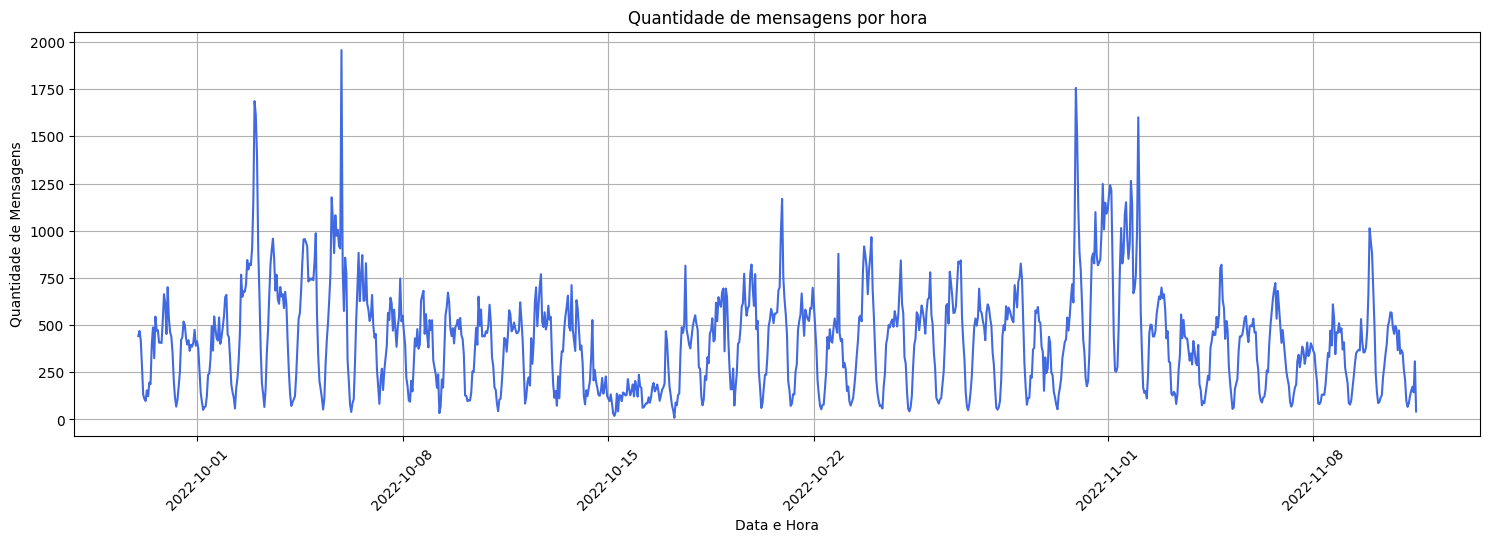

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(mensagens_por_hora['data_hora'], mensagens_por_hora['quantidade'], color='royalblue')
plt.title('Quantidade de mensagens por hora')
plt.xlabel('Data e Hora')
plt.ylabel('Quantidade de Mensagens')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


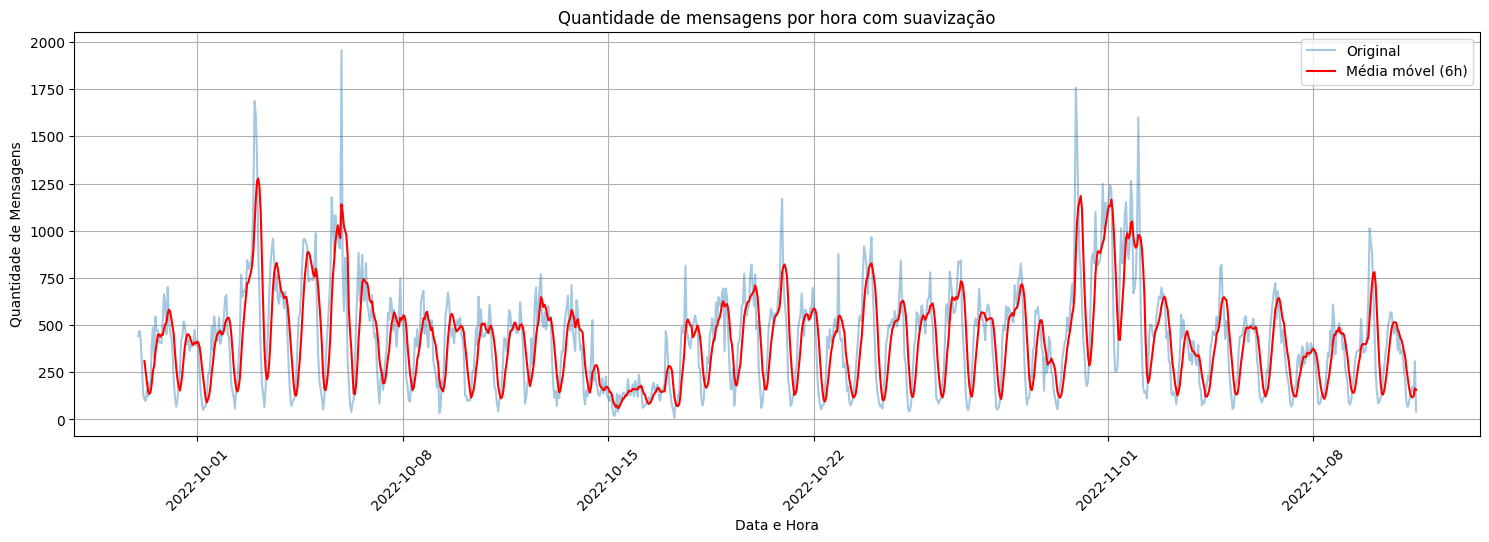

In [ ]:
# Média móvel de 6 horas 
mensagens_por_hora['rolling_avg'] = mensagens_por_hora['quantidade'].rolling(window=6).mean()

plt.figure(figsize=(15, 5))
plt.plot(mensagens_por_hora['data_hora'], mensagens_por_hora['quantidade'], alpha=0.4, label='Original')
plt.plot(mensagens_por_hora['data_hora'], mensagens_por_hora['rolling_avg'], color='red', label='Média móvel (6h)')
plt.title('Quantidade de mensagens por hora com suavização')
plt.xlabel('Data e Hora')
plt.ylabel('Quantidade de Mensagens')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Quantidade de mensagens por hora; 

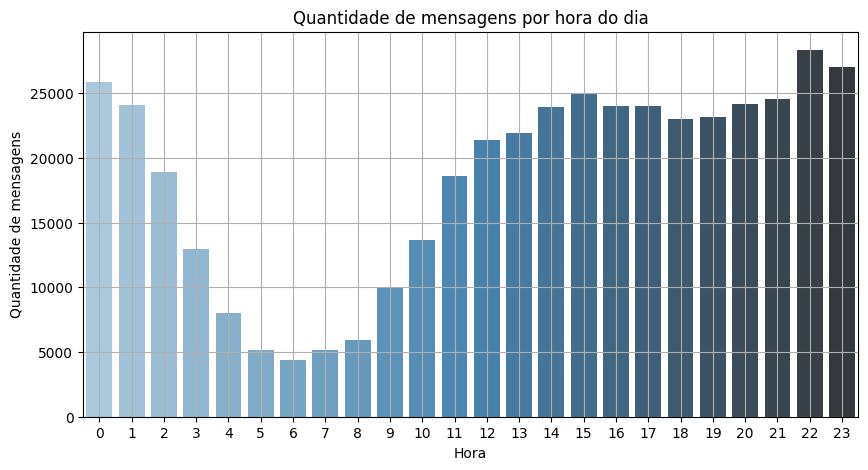

In [ ]:
# Quantidade de mensagens por hora; 
df_quantidade['hora'] = df_quantidade['date_message'].dt.hour
mensagens_por_hora = df_quantidade.groupby('hora').size().reset_index(name='quantidade')

# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x='hora', y='quantidade', data=mensagens_por_hora, palette='Blues_d')
plt.title('Quantidade de mensagens por hora do dia')
plt.xlabel('Hora')
plt.ylabel('Quantidade de mensagens')
plt.grid(True)
plt.show()


### A nuvem de palavras referente às mensagens de texto (após a remoção de stop words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


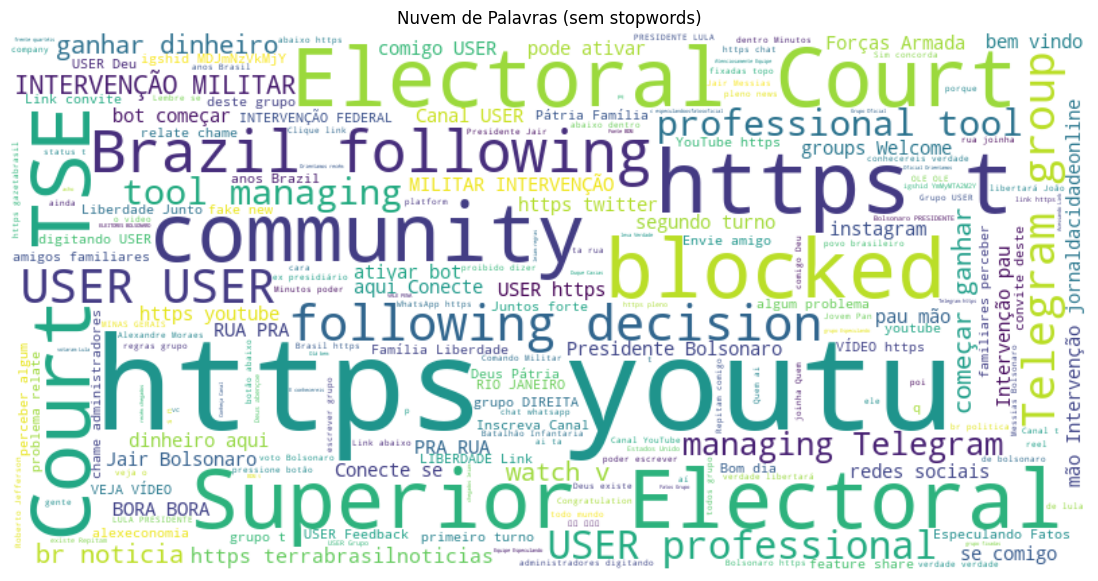

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# Preparar textos
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

textos = df_limpo['text_content_preprocessado'].dropna().astype(str)
textos_filtrados = textos.apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra.lower() not in stop_words]))

# Vetorizar bigramas
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(textos_filtrados)
sum_bigrams = X.sum(axis=0).A1
bigram_vocab = vectorizer.get_feature_names_out()

# Criar grafo
G = nx.Graph()
for bigram, freq in zip(bigram_vocab, sum_bigrams):
    w1, w2 = bigram.split()
    if freq > 50:  # Ajuste conforme necessário
        G.add_edge(w1, w2, weight=int(freq))

# Desenhar grafo
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]

# Normalizar pesos para colormap
vmin = min(weights)
vmax = max(weights)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color='lightblue',
    edge_color=weights,
    edge_cmap=plt.cm.Blues,
    edge_vmin=vmin,
    edge_vmax=vmax,
    width=2.0,
    font_size=10
)

plt.title('Rede de Coocorrência de Palavras (bigrams)', fontsize=14)
plt.show()


### A rede interativa das palavras referente às mensagens de texto (após a remoção de stop words);

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ACER\AppData\Local\Temp\ipykernel_14888\4096588729.py:45: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(grafo, pos, edge_color=weights, edge_cmap=plt.cm.Blues,
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 119834 (\N{MATHEMATICAL BOLD SMALL A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 119847 (\N{MATHEMATICAL BOLD SMALL N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 119

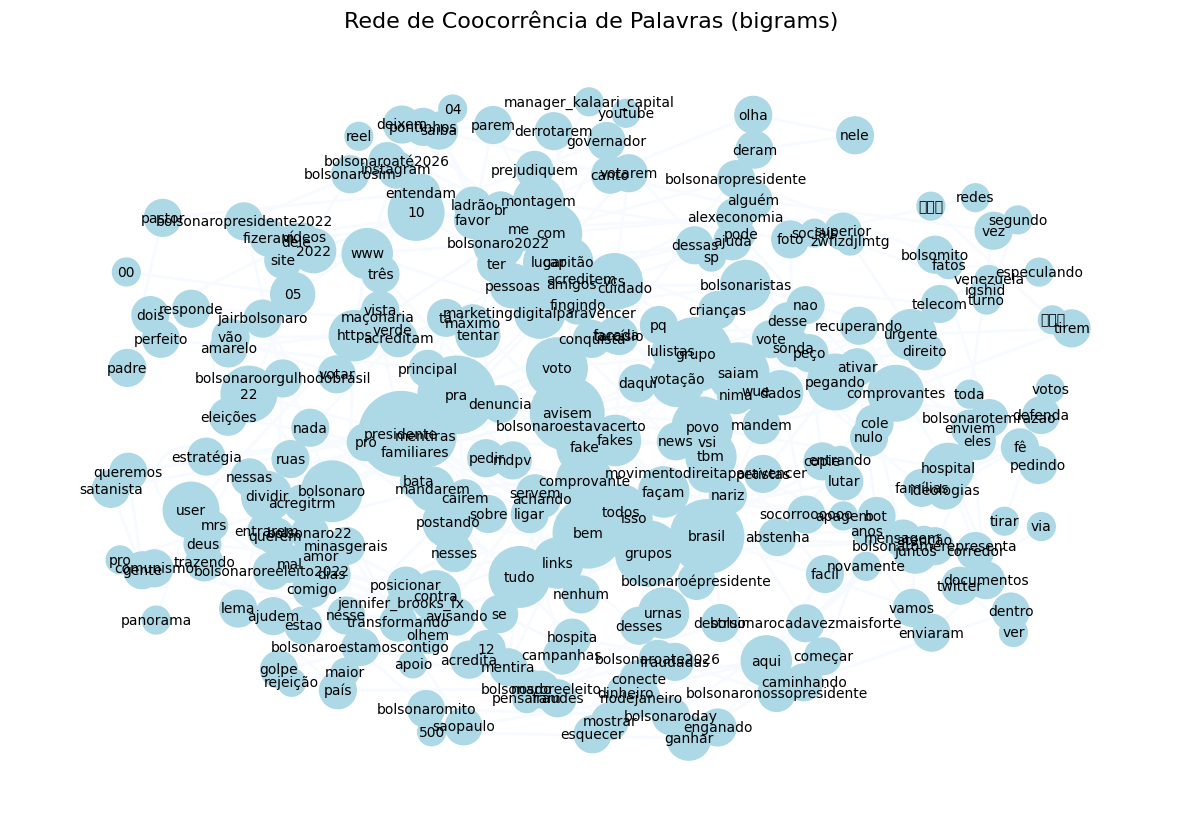

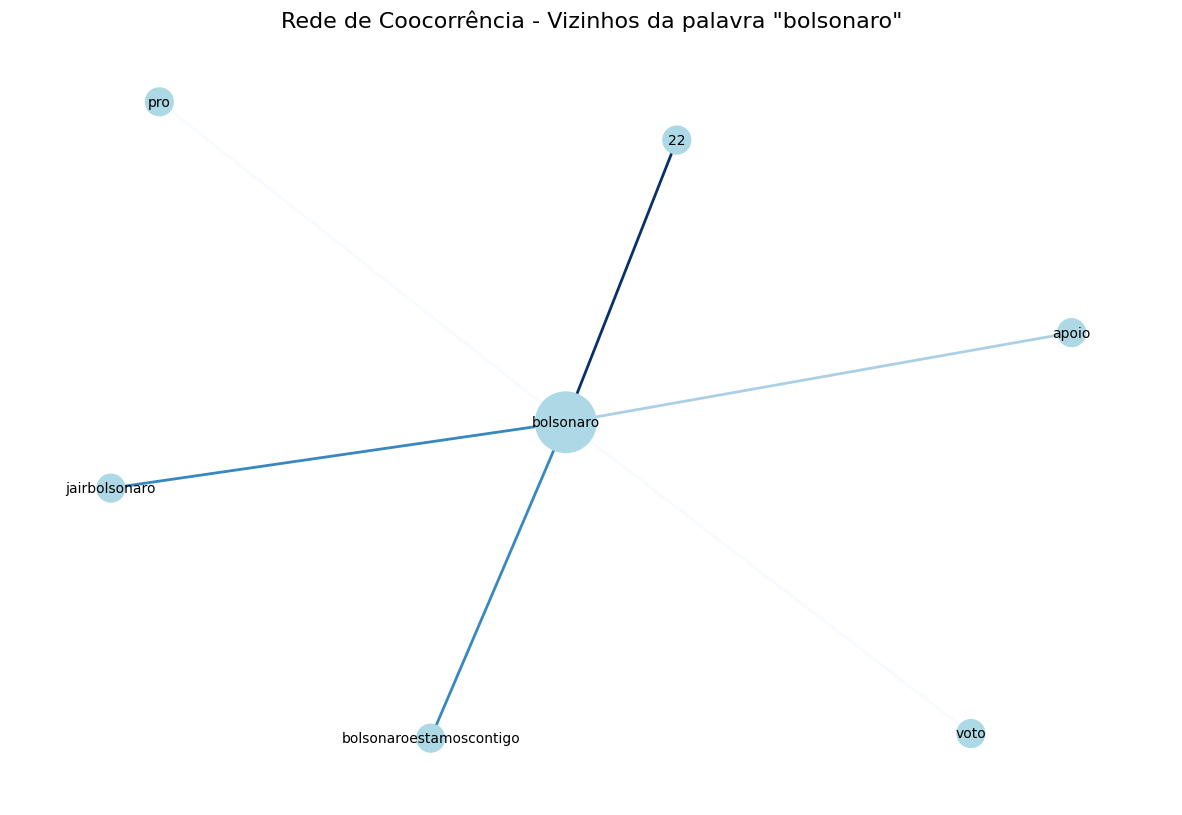

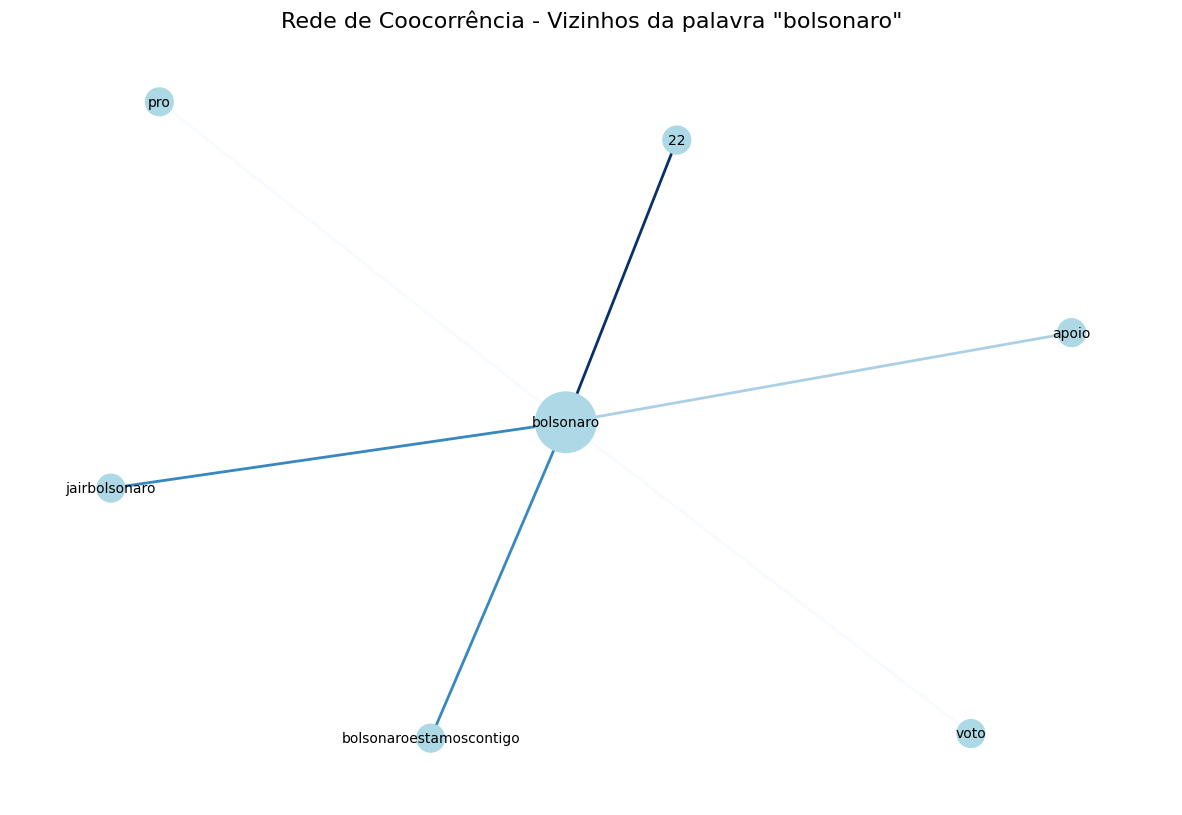

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# Baixar stopwords se necessário
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

df_reduzido = df_limpo[:100]
# Preparar textos - sua coluna de texto limpa, sem nulos
textos = df_reduzido['text_content_anonymous'].dropna().astype(str)

# Filtrar stopwords manualmente (opcional, pois CountVectorizer também remove)
textos_filtrados = textos.apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra.lower() not in stop_words]))

# Vetorizar bigramas sem stopwords (já filtradas)
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(textos_filtrados)

# Somar frequências dos bigramas
sum_bigrams = X.sum(axis=0).A1
bigram_vocab = vectorizer.get_feature_names_out()

# Criar grafo
G = nx.Graph()
for bigram, freq in zip(bigram_vocab, sum_bigrams):
    if freq > 2:  # filtro para considerar só bigramas frequentes
        w1, w2 = bigram.split()
        G.add_edge(w1, w2, weight=int(freq))

def desenhar_grafo(grafo, titulo):
    if grafo.number_of_edges() == 0:
        print(f"Nenhuma aresta encontrada para: {titulo}")
        return

    fig, ax = plt.subplots(figsize=(15, 10))
    pos = nx.spring_layout(grafo, k=0.5, seed=42)

    weights = [d['weight'] for (_, _, d) in grafo.edges(data=True)]
    vmin, vmax = min(weights), max(weights)
    node_sizes = [100 + 300 * grafo.degree(n) for n in grafo.nodes()]

    nx.draw_networkx_edges(grafo, pos, edge_color=weights, edge_cmap=plt.cm.Blues,
                           edge_vmin=vmin, edge_vmax=vmax, width=2, ax=ax)
    nx.draw_networkx_nodes(grafo, pos, node_size=node_sizes, node_color='lightblue', ax=ax)
    nx.draw_networkx_labels(grafo, pos, font_size=10, ax=ax)

    plt.title(titulo, fontsize=16)
    plt.axis('off')
    plt.show()

# Desenhar o grafo completo
desenhar_grafo(G, 'Rede de Coocorrência de Palavras (bigrams)')

# --- Exemplo: subgrafo dos 30 vizinhos mais fortes da palavra 'exemplo' ---

palavra_central = 'bolsonaro'  


if palavra_central in G:
    arestas = [(u, v, d['weight']) for u, v, d in G.edges(data=True) if palavra_central in (u, v)]
    arestas_ordenadas = sorted(arestas, key=lambda x: x[2], reverse=True)
    arestas_top30 = arestas_ordenadas[:30]

    subgrafo = nx.Graph()
    subgrafo.add_edges_from([(u, v, {'weight': w}) for u, v, w in arestas_top30])

    if palavra_central not in subgrafo.nodes():
        subgrafo.add_node(palavra_central)

    desenhar_grafo(subgrafo, f'Rede de Coocorrência - Vizinhos da palavra \"{palavra_central}\"')
else:
    print(f"A palavra '{palavra_central}' não está presente no grafo.")

desenhar_grafo(subgrafo, f'Rede de Coocorrência - Vizinhos da palavra "{palavra_central}"')


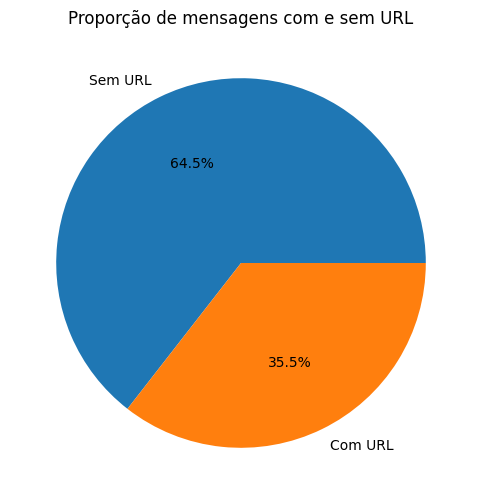

In [ ]:
# Proporção de mensagens com e sem URL; 

proporcao_url = df_quantidade['has_media_url'].value_counts(normalize=True).rename(index={True: 'Com URL', False: 'Sem URL'}) * 100
proporcao_url.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Proporção de mensagens com e sem URL')
plt.ylabel('')
plt.show()


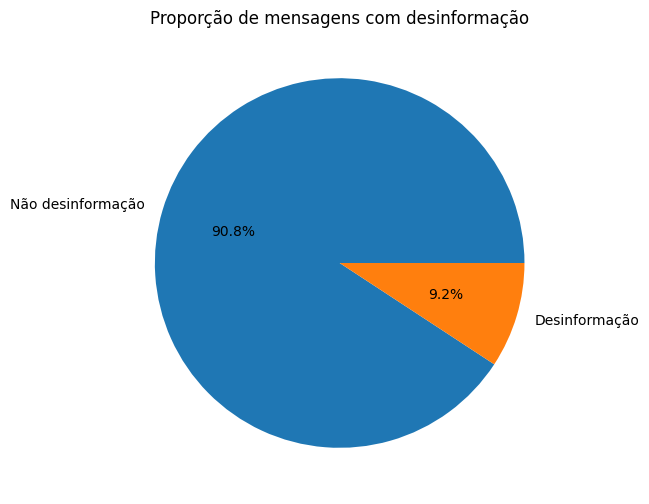

In [ ]:
# Proporção de desinformação; 

df_quantidade['desinformacao'] = df_quantidade['score_misinformation'] > 0.5
proporcao_desinfo = df_quantidade['desinformacao'].value_counts(normalize=True).rename(index={True: 'Desinformação', False: 'Não desinformação'}) * 100

proporcao_desinfo.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Proporção de mensagens com desinformação')
plt.ylabel('')
plt.show()


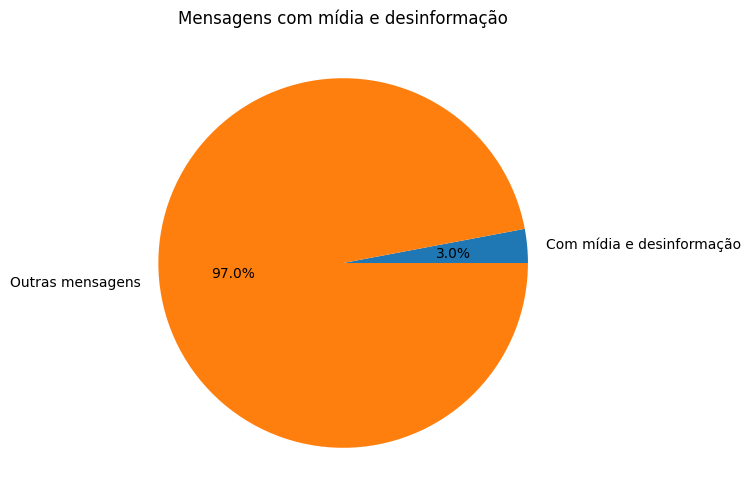

In [ ]:
# Proporção de mensagens contendo mídia e desinformação; 

# Ambas as condições
mídia_desinfo = df_quantidade[(df_quantidade['has_media'] == True) & (df_quantidade['score_misinformation'] > 0.5)]

# Contagens
contagem = pd.Series({
    'Com mídia e desinformação': len(mídia_desinfo),
    'Outras mensagens': len(df_quantidade) - len(mídia_desinfo)
})

contagem.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Mensagens com mídia e desinformação')
plt.ylabel('')
plt.show()


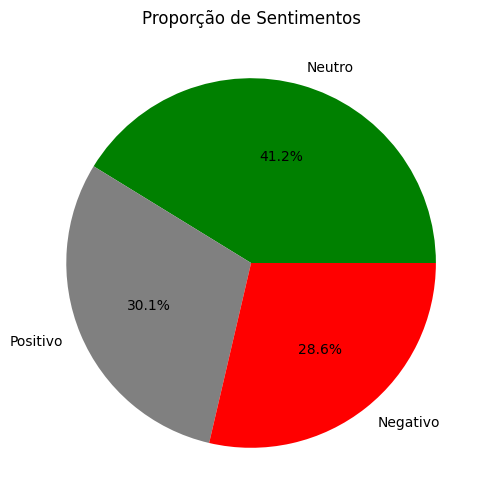

In [ ]:
# Proporção de sentimentos; 

def classificar_sentimento(score):
    if score > 0.05:
        return 'Positivo'
    elif score < -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

df_quantidade['sentimento'] = df_quantidade['score_sentiment'].apply(classificar_sentimento)

# Proporção de sentimentos
proporcao_sentimentos = df_quantidade['sentimento'].value_counts(normalize=True) * 100

# Gráfico
proporcao_sentimentos.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Proporção de Sentimentos', colors=['green', 'gray', 'red'])
plt.ylabel('')
plt.show()


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


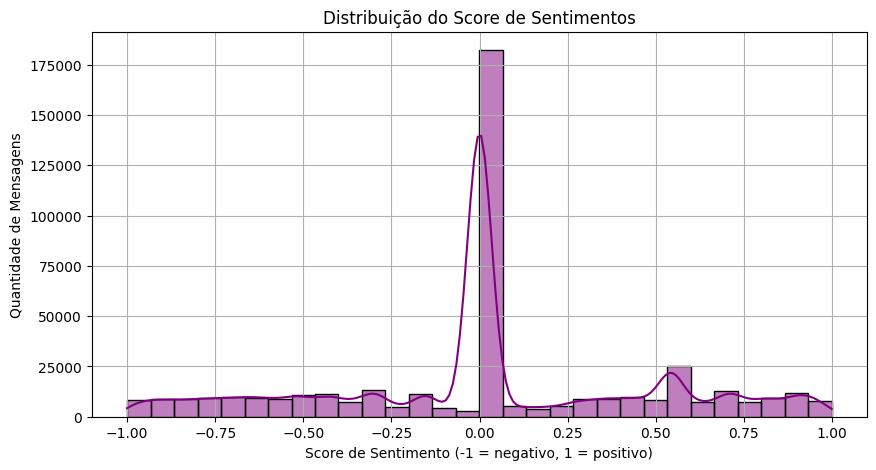

In [ ]:
# Distribuição de mensagens por score de sentimentos; 


plt.figure(figsize=(10, 5))
sns.histplot(df_quantidade['score_sentiment'], bins=30, kde=True, color='purple')
plt.title('Distribuição do Score de Sentimentos')
plt.xlabel('Score de Sentimento (-1 = negativo, 1 = positivo)')
plt.ylabel('Quantidade de Mensagens')
plt.grid(True)
plt.show()


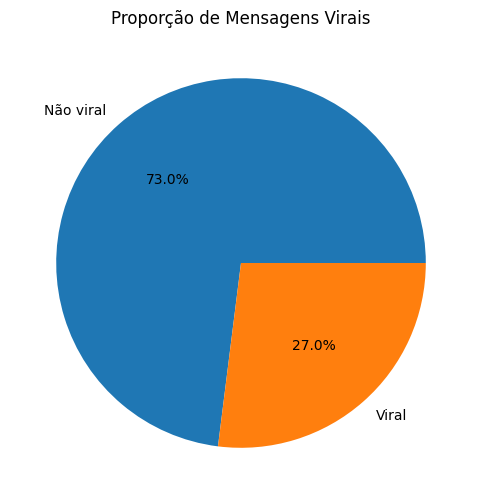

In [ ]:
# Proporção entre mensagens virais e não virais; 

# Contar quantas vezes cada texto aparece
frequencias = df_limpo['text_content_anonymous'].value_counts()

# Marcar como viral se aparece mais de 5 vezes
df_quantidade['mensagem_viral'] = df_quantidade['text_content_anonymous'].map(frequencias) > 5

# Proporção
proporcao_virais = df_quantidade['mensagem_viral'].value_counts(normalize=True).rename(index={True: 'Viral', False: 'Não viral'}) * 100

# Gráfico
proporcao_virais.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Proporção de Mensagens Virais')
plt.ylabel('')
plt.show()


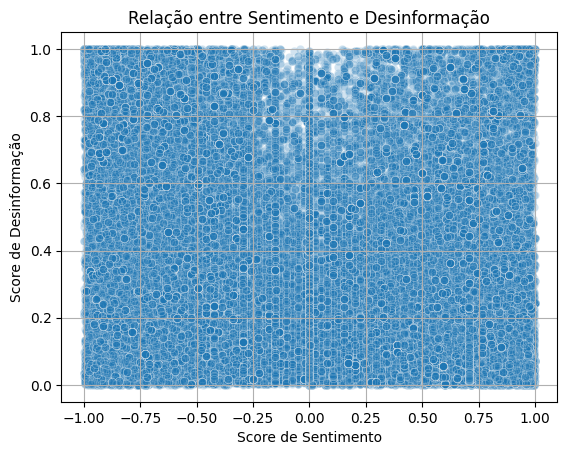

In [ ]:
# Existe associação entre mensagens com alto score de desinformação e sentimento negativo?
sns.scatterplot(data=df_quantidade, x='score_sentiment', y='score_misinformation', alpha=0.2)
plt.title('Relação entre Sentimento e Desinformação')
plt.xlabel('Score de Sentimento')
plt.ylabel('Score de Desinformação')
plt.grid(True)
plt.show()


Não é possível afirmar uma associação clara entre sentimento negativo e desinformação alta.

As mensagens com score alto de desinformação estão espalhadas tanto em sentimentos negativos quanto positivos.

In [ ]:
mais_grupos = df_quantidade.groupby('text_content_anonymous')['id_group_anonymous'].nunique().sort_values(ascending=False).head(10)
mais_grupos.head()


text_content_anonymous
This community was blocked in Brazil following a decision of the Superior Electoral Court (TSE).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

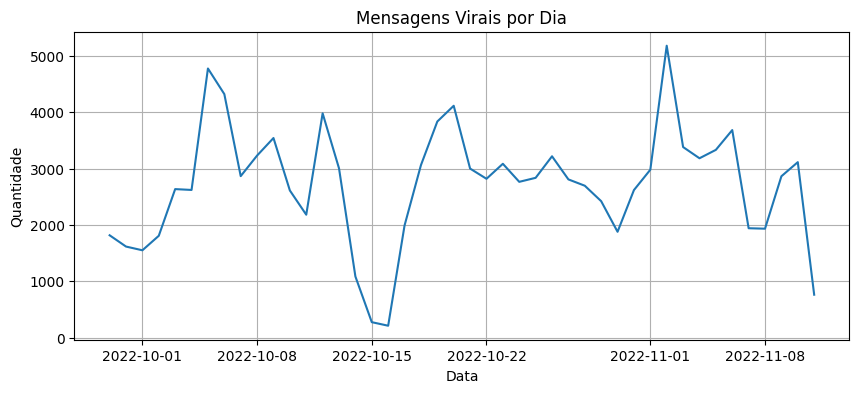

In [ ]:
# Como a desinformação ou viralização evolui ao longo do tempo?

df_quantidade['date'] = pd.to_datetime(df_quantidade['date_message']).dt.date
mensagens_por_dia = df_quantidade[df_quantidade['mensagem_viral']].groupby('date').size()

plt.figure(figsize=(10, 4))
mensagens_por_dia.plot()
plt.title('Mensagens Virais por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()
